# **MTN Nigeria Customer Churn Prediction Project**
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## **Project Overview**
Customer churn is a critical challenge in the Nigerian telecom industry. Retaining existing customers is more cost-effective than acquiring new ones. This project aims to develop a predictive model that identifies customers at risk of leaving MTN Nigeria, enabling targeted retention strategies and data-driven business decisions.

---

## **Project Workflow**

### **1. Problem Understanding**
- Define the business problem: predicting customer churn.  
- Understand the implications of churn on revenue and customer lifetime value.  

### **2. Data Collection & Understanding**
- Utilize the MTN Nigeria Customer Churn & Usage Dataset (2025).  
- Explore dataset features such as demographics, device usage, subscription plans, revenue, and churn status.  

### **3. Data Preprocessing**
- Handle missing values, duplicates, and irrelevant columns.  
- Encode categorical variables and normalize numerical features.  
- Engineer new features from dates, reviews, and usage patterns.  

### **4. Exploratory Data Analysis (EDA)**
- Visualize data distributions, correlations, and churn patterns.  
- Identify factors contributing to customer churn.  
- Detect class imbalance and address if necessary.  

### **5. Model Development**
- Split dataset into training and testing sets.  
- Train baseline models (Logistic Regression) and advanced models (Decision Trees, Random Forest, Gradient Boosting).  
- Tune hyperparameters and evaluate using cross-validation.  
- Interpret model outputs using feature importance and SHAP values.  

### **6. Customer Segmentation**
- Apply clustering techniques to segment customers based on behavioral and demographic patterns.  
- Identify high-value and high-risk segments for targeted strategies.  

### **7. Visualization & Dashboarding**
- Create insightful plots and interactive dashboards to communicate results.  
- Visualize churn probability, revenue impact, and key features.  

### **8. Data Storytelling**
- Translate insights into actionable recommendations for business stakeholders.  
- Highlight strategies for retention and customer engagement.  

### **9. Deployment & Monitoring**
- Deploy predictive model via API or CRM integration.  
- Monitor performance over time and retrain with updated data.  

### **10. Documentation & Compliance**
- Document the entire methodology, code, and decisions.  
- Ensure model interpretability and regulatory compliance for predictions.  

---

**Outcome:**  
A robust, interpretable predictive model that identifies customers at risk of churning, allowing MTN Nigeria to implement targeted retention campaigns and optimize revenue while enhancing customer satisfaction.


In [2]:
# Cell 2: Import Required Libraries and Packages

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing and feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Explainability
import shap

# System & warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Cell 3: Load Dataset and Initial Inspection

# Define dataset path (update the path as per your local system)
DATA_PATH = "mtn_customer_churn.csv"

# Load the dataset
df = pd.read_csv(DATA_PATH)

# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Dataset info and structure
print("\nDataset Information:")
df.info()

# Summary statistics for numerical features
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values per Column:")
display(df.isnull().sum())

# Check for duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


First 5 rows of the dataset:


Customer ID     Full Name Date of Purchase  Age        State  \
0    CUST0001   Ngozi Berry           Jan-25   27        Kwara   
1    CUST0002  Zainab Baker           Mar-25   16  Abuja (FCT)   
2    CUST0003   Saidu Evans           Mar-25   21       Sokoto   
3    CUST0003   Saidu Evans           Mar-25   21       Sokoto   
4    CUST0003   Saidu Evans           Mar-25   21       Sokoto   

            MTN Device  Gender  Satisfaction Rate Customer Review  \
0            4G Router    Male                  2            Fair   
1      Mobile SIM Card  Female                  2            Fair   
2  5G Broadband Router    Male                  1            Poor   
3      Mobile SIM Card    Male                  1            Poor   
4       Broadband MiFi    Male                  1            Poor   

   Customer Tenure in months            Subscription Plan  Unit Price  \
0                          2           165GB Monthly Plan       35000   
1                         22          12.5GB Monthly Plan        5500   
2                         60  150GB FUP Monthly Unlimited       20000   
3                         60       1GB+1.5mins Daily Plan         500   
4                         60  30GB Monthly Broadband Plan        9000   

   Number of Times Purchased  Total Revenue  Data Usage Customer Churn Status  \
0                         19         665000       44.48                   Yes   
1                         12          66000       19.79                   Yes   
2                          8         160000        9.64                    No   
3                          8           4000      197.05                    No   
4                         15         135000       76.34                    No   

                Reasons for Churn  
0                      Relocation  
1  Better Offers from Competitors  
2                             NaN  
3                             NaN  
4                             NaN


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              9

Age  Satisfaction Rate  Customer Tenure in months  \
count  974.000000         974.000000                 974.000000   
mean    48.043121           2.947639                  31.422998   
std     17.764307           1.384219                  17.191256   
min     16.000000           1.000000                   1.000000   
25%     32.000000           2.000000                  17.000000   
50%     49.000000           3.000000                  31.000000   
75%     63.750000           4.000000                  47.000000   
max     80.000000           5.000000                  60.000000   

          Unit Price  Number of Times Purchased  Total Revenue  Data Usage  
count     974.000000                 974.000000   9.740000e+02  974.000000  
mean    19196.663244                  10.564682   2.046696e+05   99.304764  
std     25586.726985                   5.709427   3.247855e+05   57.739511  
min       350.000000                   1.000000   3.500000e+02    0.820000  
25%      5500.000000                   5.000000   3.300000e+04   47.637500  
50%     14500.000000                  11.000000   1.080000e+05  103.330000  
75%     24000.000000                  15.000000   2.610000e+05  149.697500  
max    150000.000000                  20.000000   3.000000e+06  200.000000


Missing Values per Column:


Customer ID                    0
Full Name                      0
Date of Purchase               0
Age                            0
State                          0
MTN Device                     0
Gender                         0
Satisfaction Rate              0
Customer Review                0
Customer Tenure in months      0
Subscription Plan              0
Unit Price                     0
Number of Times Purchased      0
Total Revenue                  0
Data Usage                     0
Customer Churn Status          0
Reasons for Churn            690
dtype: int64


Number of Duplicate Rows: 0


In [4]:
# Cell 4: Data Cleaning and Preprocessing 

# Drop irrelevant columns for modeling
df_clean = df.drop(columns=['Customer ID', 'Full Name', 'Customer Review'])

# Convert 'Date of Purchase' to datetime
# The format is assumed to be 'Mon-YY', e.g., 'Jan-25'
df_clean['Date of Purchase'] = pd.to_datetime(df_clean['Date of Purchase'], format='%b-%y', errors='coerce')

# Check for any parsing failures
if df_clean['Date of Purchase'].isnull().sum() > 0:
    print("Warning: Some dates could not be parsed and will be dropped.")
    df_clean = df_clean.dropna(subset=['Date of Purchase'])

# Extract year and month
df_clean['Purchase_Year'] = df_clean['Date of Purchase'].dt.year
df_clean['Purchase_Month'] = df_clean['Date of Purchase'].dt.month

# Drop original 'Date of Purchase'
df_clean = df_clean.drop(columns=['Date of Purchase'])

# Encode categorical variables
categorical_cols = ['State', 'MTN Device', 'Gender', 'Subscription Plan']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Encode target variable: 'Customer Churn Status'
df_encoded['Customer Churn Status'] = df_encoded['Customer Churn Status'].map({'Active':0, 'Churned':1})

# Display first 5 rows after preprocessing
print("First 5 rows after cleaning and encoding:")
display(df_encoded.head())


First 5 rows after cleaning and encoding:


Age  Satisfaction Rate  Customer Tenure in months  Unit Price  \
0   27                  2                          2       35000   
1   16                  2                         22        5500   
2   21                  1                         60       20000   
3   21                  1                         60         500   
4   21                  1                         60        9000   

   Number of Times Purchased  Total Revenue  Data Usage  \
0                         19         665000       44.48   
1                         12          66000       19.79   
2                          8         160000        9.64   
3                          8           4000      197.05   
4                         15         135000       76.34   

   Customer Churn Status               Reasons for Churn  Purchase_Year  ...  \
0                    NaN                      Relocation           2025  ...   
1                    NaN  Better Offers from Competitors           2025  ...   
2                    NaN                             NaN           2025  ...   
3                    NaN                             NaN           2025  ...   
4                    NaN                             NaN           2025  ...   

   Subscription Plan_20GB Monthly Plan  Subscription Plan_25GB Monthly Plan  \
0                                False                                False   
1                                False                                False   
2                                False                                False   
3                                False                                False   
4                                False                                False   

   Subscription Plan_3.2GB 2-Day Plan  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   Subscription Plan_300GB FUP Monthly Unlimited  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Subscription Plan_30GB Monthly Broadband Plan  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                           True   

   Subscription Plan_450GB 3-Month Broadband Plan  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Subscription Plan_500MB Daily Plan  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   Subscription Plan_60GB Monthly Broadband Plan  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Subscription Plan_65GB Monthly Plan  Subscription Plan_7GB Monthly Plan  
0                                False                               False  
1                                False                               False  
2                                False                               False  
3                                False                               False  
4                                False                               False  

[5 rows x 69 columns]

In [5]:
# Cell 5a: Verify Column Names
# List all column names
for col in df_encoded.columns:
    print(col)


Age
Satisfaction Rate
Customer Tenure in months
Unit Price
Number of Times Purchased
Total Revenue
Data Usage
Customer Churn Status
Reasons for Churn
Purchase_Year
Purchase_Month
State_Abuja (FCT)
State_Adamawa
State_Akwa Ibom
State_Anambra
State_Bauchi
State_Bayelsa
State_Benue
State_Borno
State_Cross River
State_Delta
State_Edo
State_Ekiti
State_Enugu
State_Gombe
State_Imo
State_Jigawa
State_Kaduna
State_Kano
State_Katsina
State_Kebbi
State_Kogi
State_Kwara
State_Lagos
State_Nasarawa
State_Niger
State_Ondo
State_Osun
State_Oyo
State_Plateau
State_Rivers
State_Sokoto
State_Taraba
State_Yobe
State_Zamfara
MTN Device_5G Broadband Router
MTN Device_Broadband MiFi
MTN Device_Mobile SIM Card
Gender_Male
Subscription Plan_1.5TB Yearly Broadband Plan
Subscription Plan_10GB+10mins Monthly Plan
Subscription Plan_12.5GB Monthly Plan
Subscription Plan_120GB Monthly Broadband Plan
Subscription Plan_150GB FUP Monthly Unlimited
Subscription Plan_16.5GB+10mins Monthly Plan
Subscription Plan_165GB Mo

In [6]:
# Verify 'Customer Churn Status' values
print("Unique values in 'Customer Churn Status':", df_encoded['Customer Churn Status'].unique())
print("Counts of each value:")
print(df_encoded['Customer Churn Status'].value_counts())


Unique values in 'Customer Churn Status': [nan]
Counts of each value:
Series([], Name: count, dtype: int64)


In [7]:
# Inspect original 'Customer Churn Status' values
print(df_clean['Customer Churn Status'].unique())


['Yes' 'No']


In [8]:
# Cell 4: Data Cleaning and Preprocessing

# Drop irrelevant columns
df_clean = df.drop(columns=['Customer ID', 'Full Name', 'Customer Review'])

# Convert 'Date of Purchase' to datetime (Month-Year format)
df_clean['Date of Purchase'] = pd.to_datetime(df_clean['Date of Purchase'], format='%b-%y', errors='coerce')

# Drop rows where date parsing failed
df_clean = df_clean.dropna(subset=['Date of Purchase'])

# Extract Year and Month
df_clean['Purchase_Year'] = df_clean['Date of Purchase'].dt.year
df_clean['Purchase_Month'] = df_clean['Date of Purchase'].dt.month
df_clean = df_clean.drop(columns=['Date of Purchase'])

# Encode categorical variables
categorical_cols = ['State', 'MTN Device', 'Gender', 'Subscription Plan']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Correctly encode target variable: 'Customer Churn Status'
df_encoded['Customer Churn Status'] = df_clean['Customer Churn Status'].map({'No':0, 'Yes':1})

# Verify target encoding
print("Customer Churn Status value counts:")
print(df_encoded['Customer Churn Status'].value_counts())

# Display first 5 rows
display(df_encoded.head())


Customer Churn Status value counts:
Customer Churn Status
0    690
1    284
Name: count, dtype: int64


Age  Satisfaction Rate  Customer Tenure in months  Unit Price  \
0   27                  2                          2       35000   
1   16                  2                         22        5500   
2   21                  1                         60       20000   
3   21                  1                         60         500   
4   21                  1                         60        9000   

   Number of Times Purchased  Total Revenue  Data Usage  \
0                         19         665000       44.48   
1                         12          66000       19.79   
2                          8         160000        9.64   
3                          8           4000      197.05   
4                         15         135000       76.34   

   Customer Churn Status               Reasons for Churn  Purchase_Year  ...  \
0                      1                      Relocation           2025  ...   
1                      1  Better Offers from Competitors           2025  ...   
2                      0                             NaN           2025  ...   
3                      0                             NaN           2025  ...   
4                      0                             NaN           2025  ...   

   Subscription Plan_20GB Monthly Plan  Subscription Plan_25GB Monthly Plan  \
0                                False                                False   
1                                False                                False   
2                                False                                False   
3                                False                                False   
4                                False                                False   

   Subscription Plan_3.2GB 2-Day Plan  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   Subscription Plan_300GB FUP Monthly Unlimited  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Subscription Plan_30GB Monthly Broadband Plan  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                           True   

   Subscription Plan_450GB 3-Month Broadband Plan  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Subscription Plan_500MB Daily Plan  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   Subscription Plan_60GB Monthly Broadband Plan  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Subscription Plan_65GB Monthly Plan  Subscription Plan_7GB Monthly Plan  
0                                False                               False  
1                                False                               False  
2                                False                               False  
3                                False                               False  
4                                False                               False  

[5 rows x 69 columns]

In [9]:
# Drop unused columns
df_clean = df.drop(columns=['Customer ID', 'Full Name', 'Customer Review'])

# Encode target
df_clean['Customer Churn Status'] = df_clean['Customer Churn Status'].map({'No':0, 'Yes':1})

# Convert Date of Purchase
df_clean['Date of Purchase'] = pd.to_datetime(df_clean['Date of Purchase'], errors='coerce')
df_clean['Purchase_Year'] = df_clean['Date of Purchase'].dt.year
df_clean['Purchase_Month'] = df_clean['Date of Purchase'].dt.month

# One-hot encode categorical columns
categorical_cols = ['State', 'MTN Device', 'Subscription Plan', 'Gender']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=False)


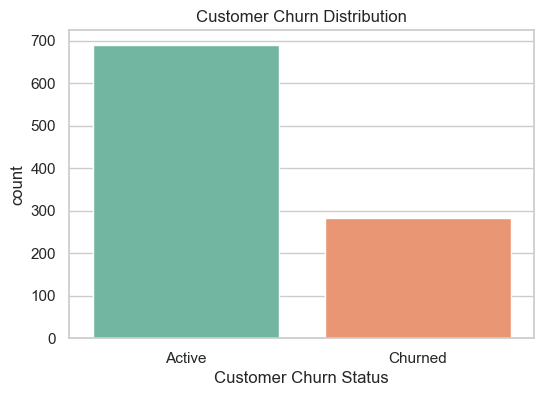

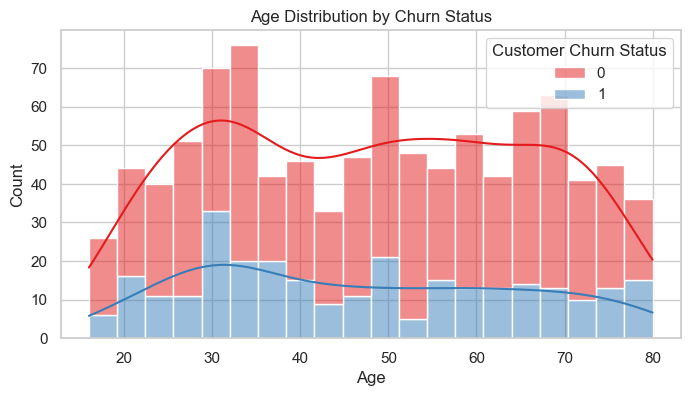

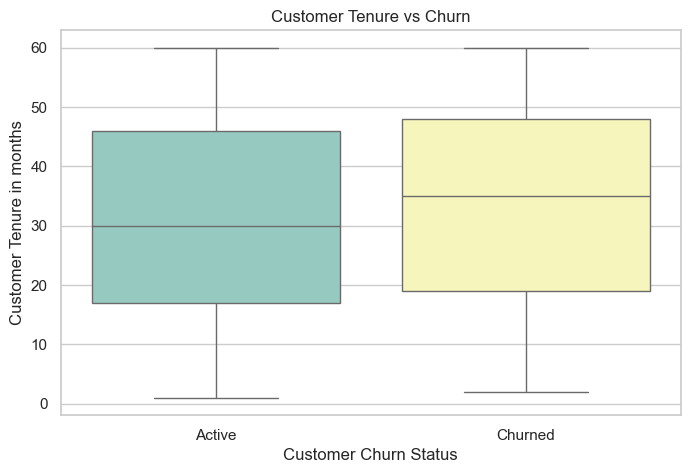

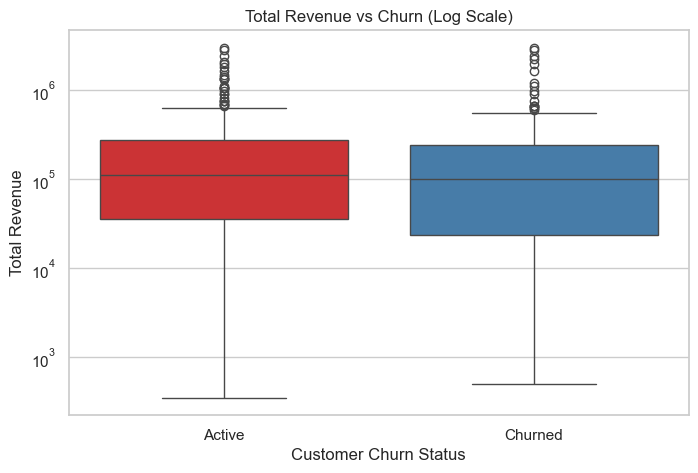

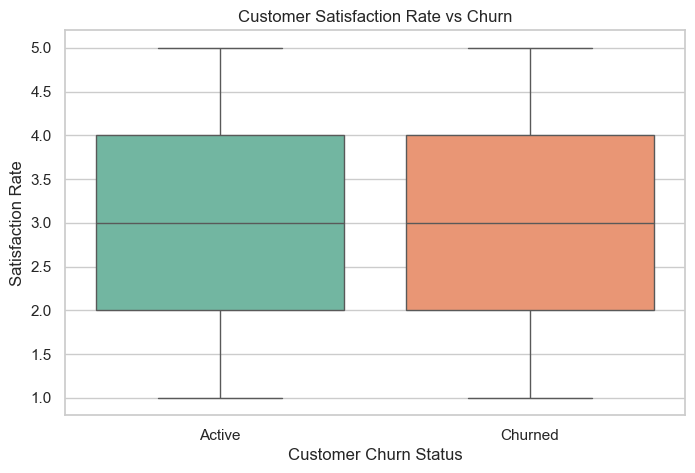

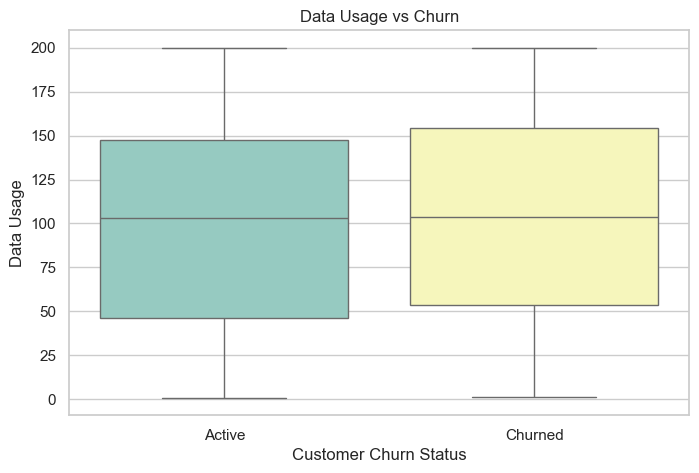

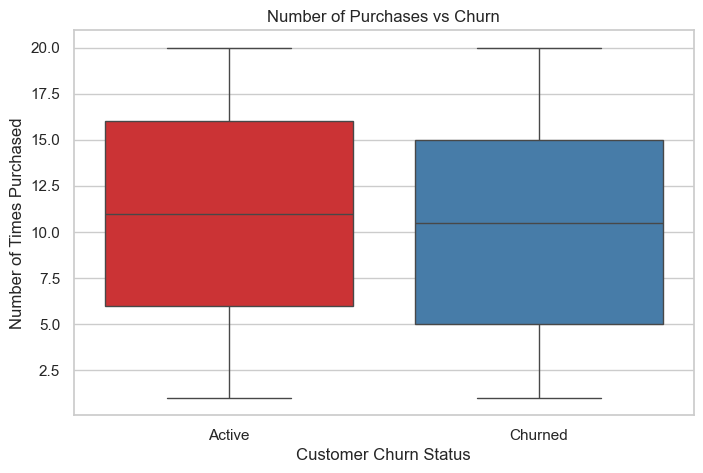

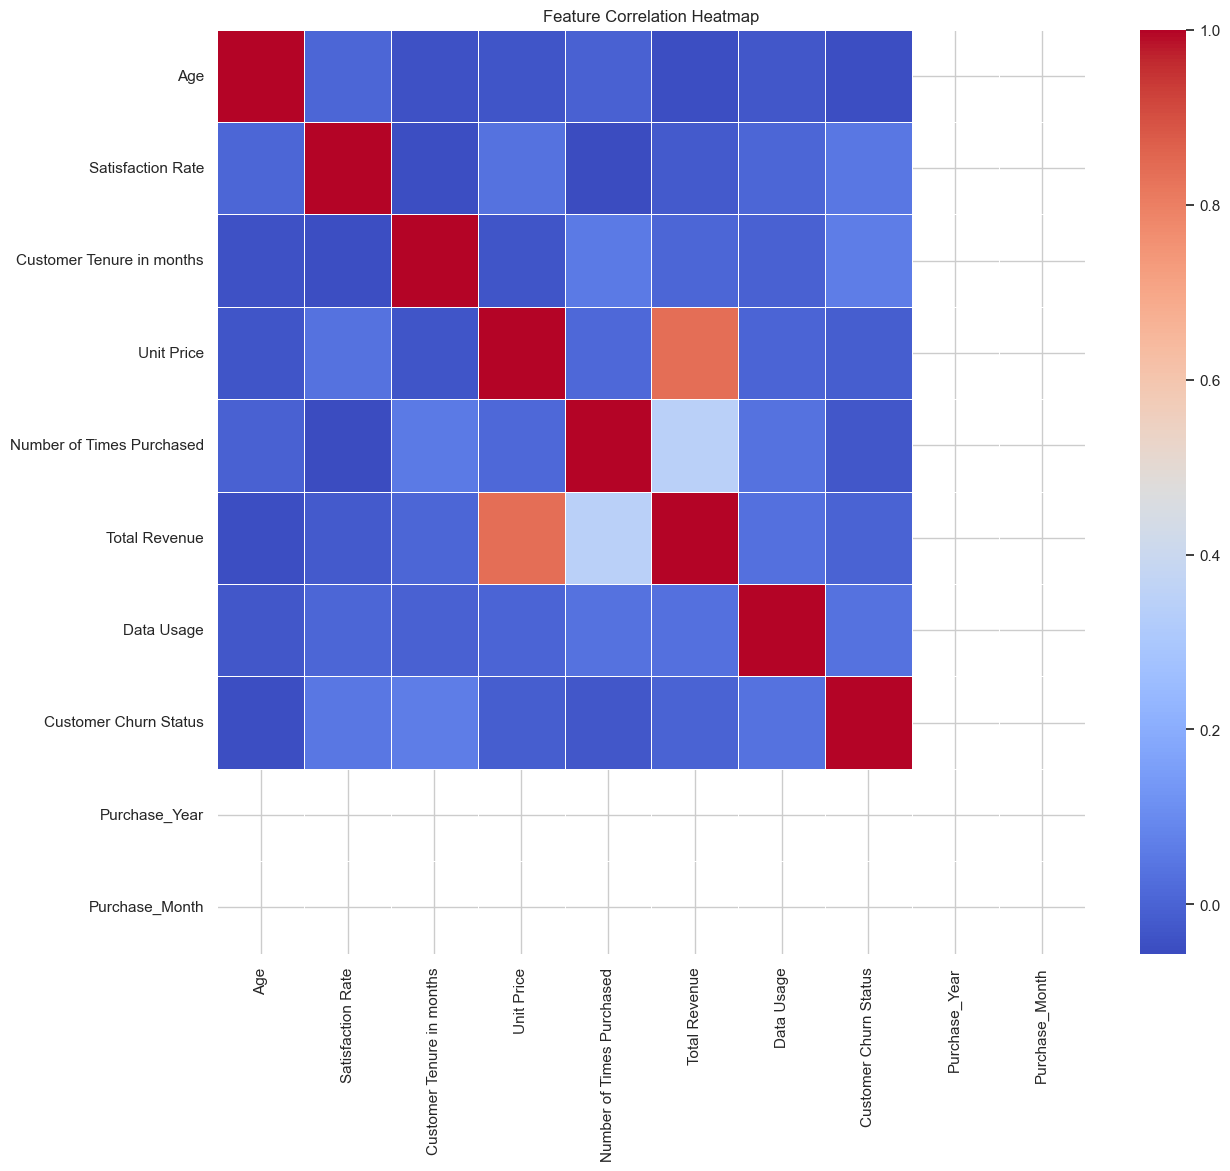

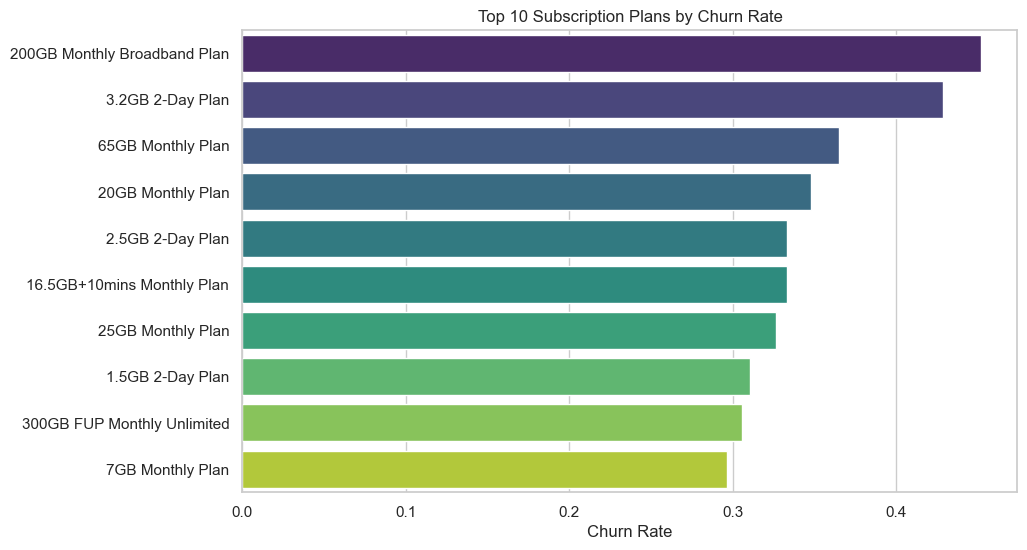

In [10]:
# Cell 5d: Comprehensive EDA and Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="whitegrid")

# 1. Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Churn Status', data=df_encoded, palette='Set2')
plt.title("Customer Churn Distribution")
plt.xticks([0,1], ['Active', 'Churned'])
plt.show()

# 2. Age Distribution by Churn
plt.figure(figsize=(8,4))
sns.histplot(data=df_encoded, x='Age', hue='Customer Churn Status', bins=20, kde=True, palette='Set1', multiple='stack')
plt.title("Age Distribution by Churn Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 3. Customer Tenure vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Churn Status', y='Customer Tenure in months', data=df_encoded, palette='Set3')
plt.xticks([0,1], ['Active', 'Churned'])
plt.title("Customer Tenure vs Churn")
plt.show()

# 4. Total Revenue vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Churn Status', y='Total Revenue', data=df_encoded, palette='Set1')
plt.yscale('log')
plt.xticks([0,1], ['Active', 'Churned'])
plt.title("Total Revenue vs Churn (Log Scale)")
plt.show()

# 5. Satisfaction Rate vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Churn Status', y='Satisfaction Rate', data=df_encoded, palette='Set2')
plt.xticks([0,1], ['Active', 'Churned'])
plt.title("Customer Satisfaction Rate vs Churn")
plt.show()

# 6. Data Usage vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Churn Status', y='Data Usage', data=df_encoded, palette='Set3')
plt.xticks([0,1], ['Active', 'Churned'])
plt.title("Data Usage vs Churn")
plt.show()

# 7. Number of Purchases vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Churn Status', y='Number of Times Purchased', data=df_encoded, palette='Set1')
plt.xticks([0,1], ['Active', 'Churned'])
plt.title("Number of Purchases vs Churn")
plt.show()

# 8. Correlation Heatmap (numeric only)
numeric_cols = df_encoded.select_dtypes(include=np.number)
plt.figure(figsize=(14,12))
corr = numeric_cols.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 9. Top Subscription Plans by Churn Rate
plan_cols = [col for col in df_encoded.columns if col.startswith('Subscription Plan')]
# Compute churn rate per plan (sum of churned / total customers with that plan)
plan_churn_rate = (df_encoded[plan_cols].T.dot(df_encoded['Customer Churn Status']) / df_encoded[plan_cols].sum()).sort_values(ascending=False)
top_plans = plan_churn_rate[:10]  # Top 10 plans

plt.figure(figsize=(10,6))
sns.barplot(x=top_plans.values, y=[col.replace('Subscription Plan_','') for col in top_plans.index], palette='viridis')
plt.xlabel("Churn Rate")
plt.title("Top 10 Subscription Plans by Churn Rate")
plt.show()


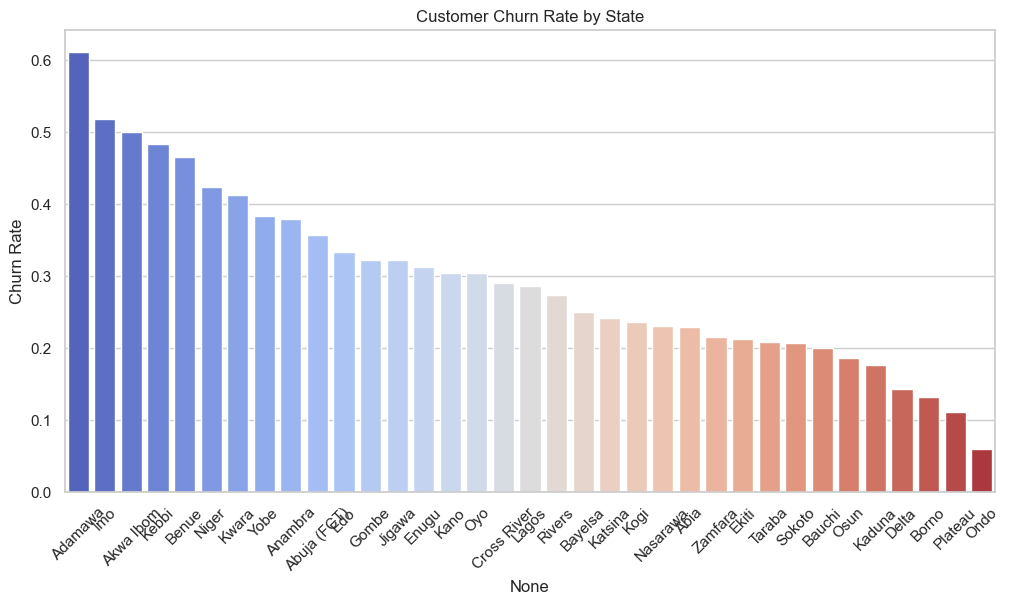

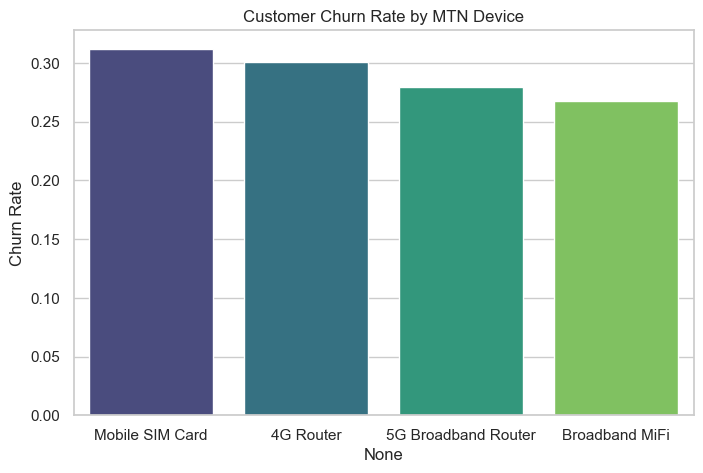

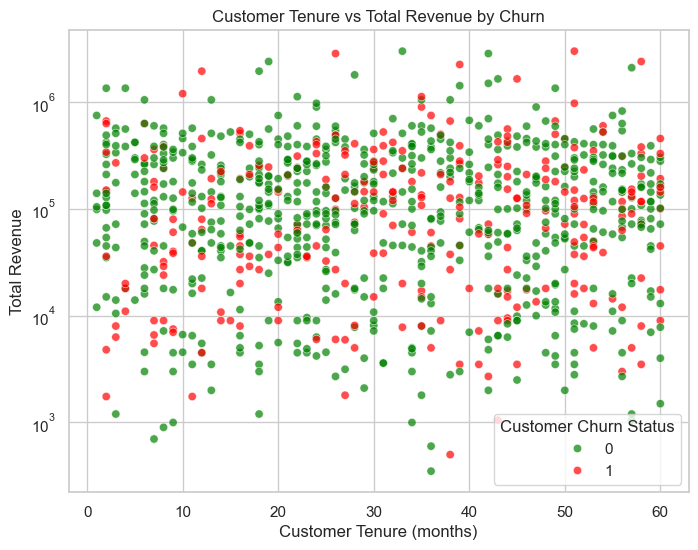

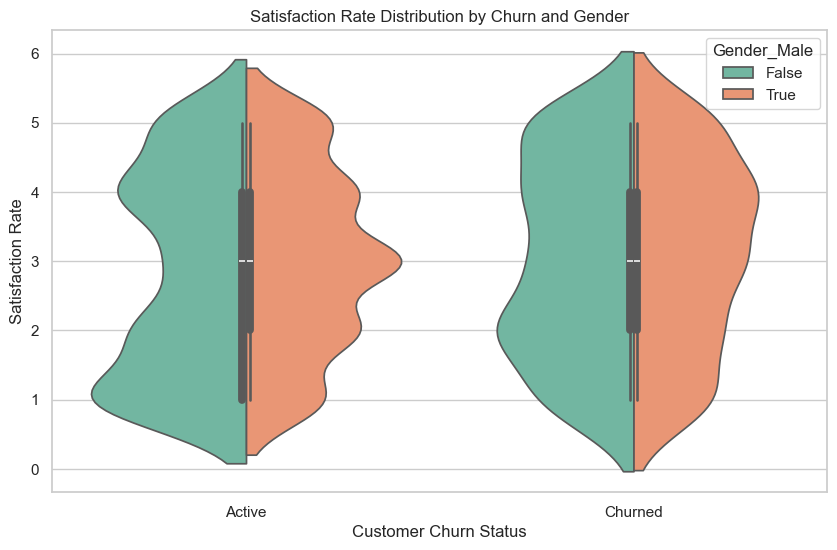

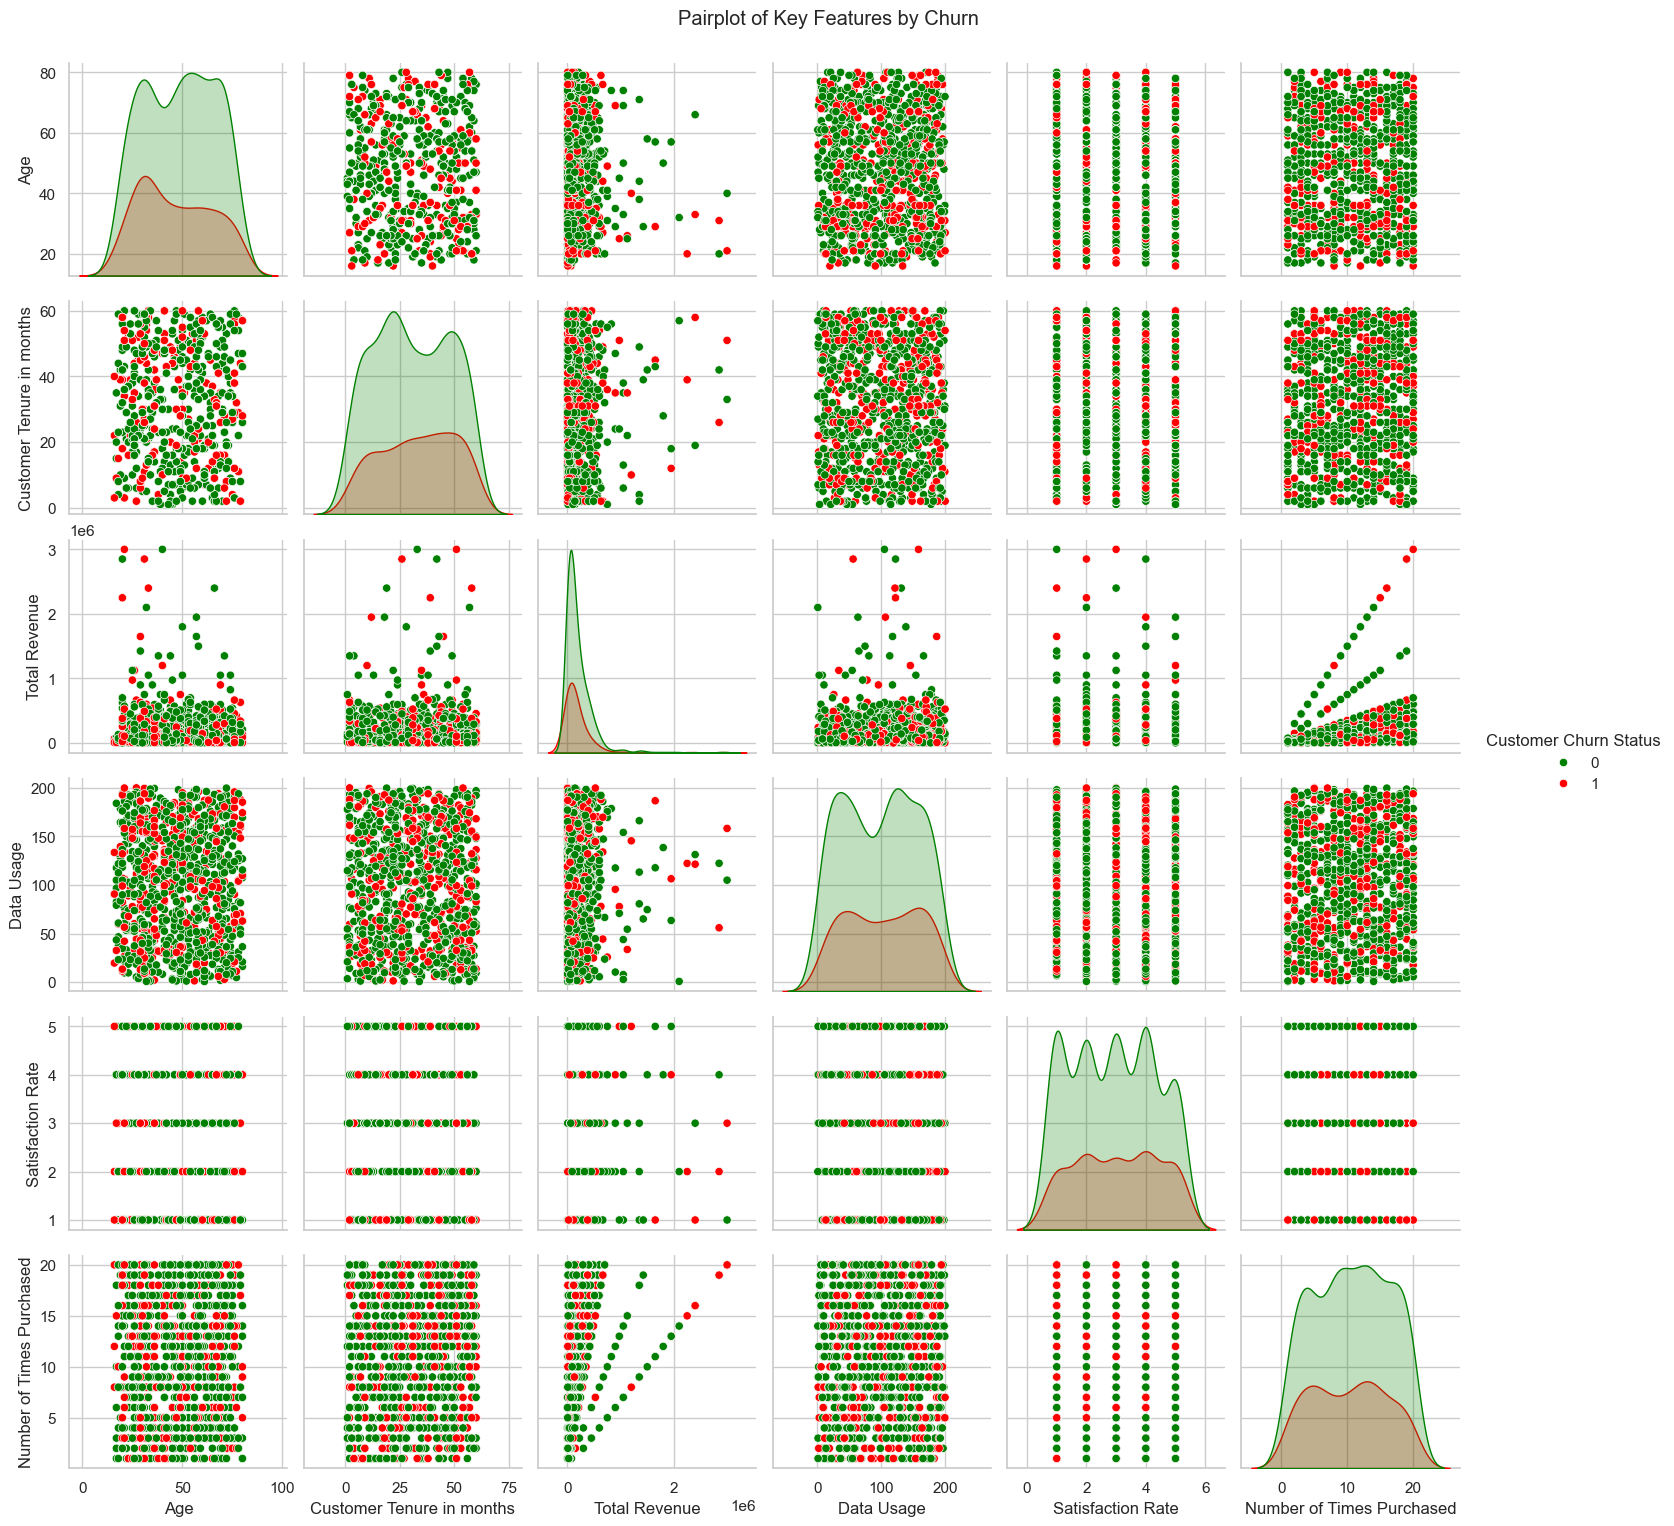

In [11]:
# Cell 5e: Advanced EDA Visualizations

# 1. Churn Rate by State
state_cols = [col for col in df_encoded.columns if col.startswith('State')]
state_churn_rate = (df_encoded[state_cols].T.dot(df_encoded['Customer Churn Status']) / df_encoded[state_cols].sum()).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=state_churn_rate.index.str.replace('State_',''), y=state_churn_rate.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.ylabel("Churn Rate")
plt.title("Customer Churn Rate by State")
plt.show()

# 2. Churn Rate by MTN Device
device_cols = [col for col in df_encoded.columns if col.startswith('MTN Device')]
device_churn_rate = (df_encoded[device_cols].T.dot(df_encoded['Customer Churn Status']) / df_encoded[device_cols].sum()).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=device_churn_rate.index.str.replace('MTN Device_',''), y=device_churn_rate.values, palette='viridis')
plt.ylabel("Churn Rate")
plt.title("Customer Churn Rate by MTN Device")
plt.show()

# 3. Customer Tenure vs Total Revenue colored by Churn
plt.figure(figsize=(8,6))
sns.scatterplot(x='Customer Tenure in months', y='Total Revenue', hue='Customer Churn Status', data=df_encoded, palette={0:'green', 1:'red'}, alpha=0.7)
plt.yscale('log')
plt.xlabel("Customer Tenure (months)")
plt.ylabel("Total Revenue")
plt.title("Customer Tenure vs Total Revenue by Churn")
plt.show()

# 4. Age vs Satisfaction Rate by Churn (Violin Plot)
plt.figure(figsize=(10,6))
sns.violinplot(x='Customer Churn Status', y='Satisfaction Rate', hue='Gender_Male', data=df_encoded, split=True, palette='Set2')
plt.xticks([0,1], ['Active','Churned'])
plt.title("Satisfaction Rate Distribution by Churn and Gender")
plt.show()

# 5. Pairplot of Key Numeric Features by Churn
numeric_features = ['Age', 'Customer Tenure in months', 'Total Revenue', 'Data Usage', 'Satisfaction Rate', 'Number of Times Purchased']
sns.pairplot(df_encoded[numeric_features + ['Customer Churn Status']], hue='Customer Churn Status', palette={0:'green', 1:'red'})
plt.suptitle("Pairplot of Key Features by Churn", y=1.02)
plt.show()


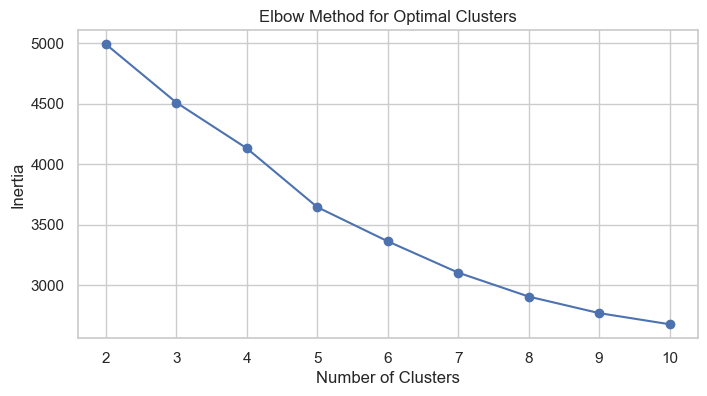

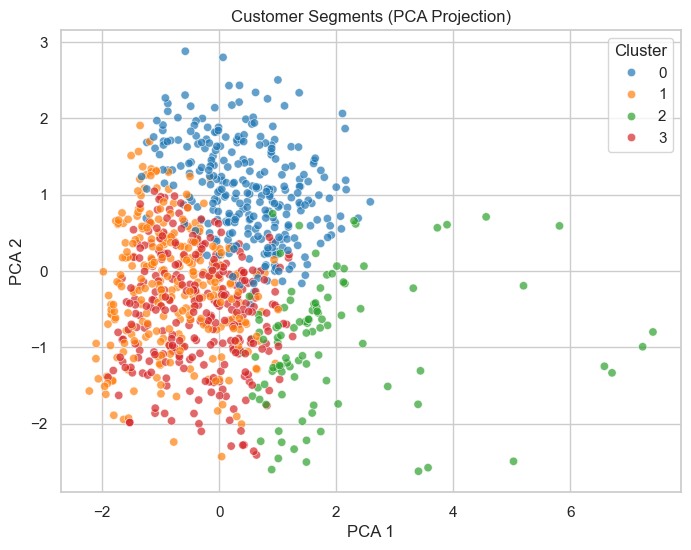

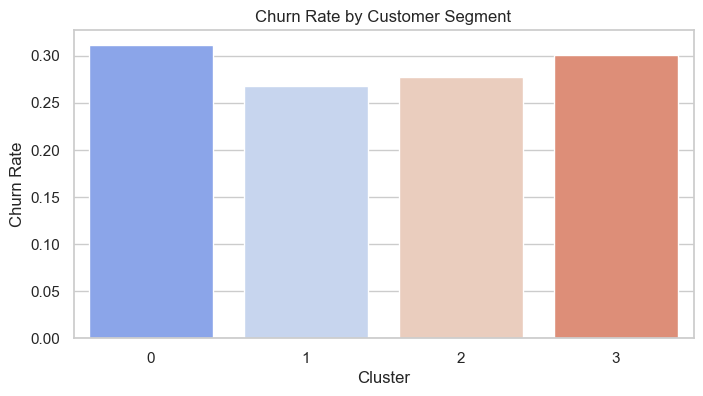

Age  Customer Tenure in months  Total Revenue  Data Usage  \
Cluster                                                                    
0        38.968858                  43.449827  174715.916955  100.841938   
1        51.707904                  24.223368  102635.395189   44.125739   
2        50.336634                  22.792079  828227.722772  106.410990   
3        52.563140                  29.686007  120605.460751  150.141365   

         Satisfaction Rate  Number of Times Purchased  Customer Churn Status  
Cluster                                                                       
0                 1.944637                  12.584775               0.311419  
1                 3.182131                   7.896907               0.268041  
2                 2.920792                  16.247525               0.277228  
3                 3.713311                   9.262799               0.300341

In [12]:
# Cell 5f: Customer Segmentation and Churn Risk
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Select features for clustering
cluster_features = ['Age', 'Customer Tenure in months', 'Total Revenue', 'Data Usage', 
                    'Satisfaction Rate', 'Number of Times Purchased']
X = df_encoded[cluster_features]

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Determine optimal number of clusters using Elbow method
inertia = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# 5. Fit KMeans with chosen k (let's assume 4 clusters for illustration)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_encoded['Cluster'] = clusters

# 6. Visualize clusters in 2D PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='tab10', alpha=0.7)
plt.title("Customer Segments (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()

# 7. Analyze churn rate per cluster
cluster_churn_rate = df_encoded.groupby('Cluster')['Customer Churn Status'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=cluster_churn_rate.index, y=cluster_churn_rate.values, palette='coolwarm')
plt.ylabel("Churn Rate")
plt.xlabel("Cluster")
plt.title("Churn Rate by Customer Segment")
plt.show()

# 8. Cluster summary statistics
cluster_summary = df_encoded.groupby('Cluster')[cluster_features + ['Customer Churn Status']].mean()
cluster_summary


In [13]:
# Cell 6: Preparing Data for Churn Prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define features and target
target = 'Customer Churn Status'
features = df_encoded.drop(columns=['Customer Churn Status', 'Cluster', 'Date of Purchase', 'Reasons for Churn'])
X = features
y = df_encoded[target]

# 2. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scale numeric features
numeric_cols = ['Age', 'Customer Tenure in months', 'Total Revenue', 'Data Usage', 
                'Satisfaction Rate', 'Number of Times Purchased']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (779, 71)
Test set shape: (195, 71)


In [15]:
# Cell 7b: Handle Missing Values for Modeling
from sklearn.impute import SimpleImputer

# 1. Initialize imputer for numeric features (replace NaN with median)
num_imputer = SimpleImputer(strategy='median')
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols])

# 2. Impute categorical/binary features (replace NaN with mode)
cat_cols = X_train.select_dtypes(include=['bool', 'object', 'int64']).columns.difference(numeric_cols)
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# 3. Verify no missing values remain
print("Missing values in X_train:\n", X_train.isna().sum().sum())
print("Missing values in X_test:\n", X_test.isna().sum().sum())


Missing values in X_train:
 1558
Missing values in X_test:
 390


In [16]:
# Check columns with missing values
missing_cols_train = X_train.isna().sum()
missing_cols_test = X_test.isna().sum()
print("Columns with missing values in X_train:\n", missing_cols_train[missing_cols_train > 0])
print("Columns with missing values in X_test:\n", missing_cols_test[missing_cols_test > 0])


Columns with missing values in X_train:
 Purchase_Year     779
Purchase_Month    779
dtype: int64
Columns with missing values in X_test:
 Purchase_Year     195
Purchase_Month    195
dtype: int64


In [17]:
# Drop columns with all missing values
X_train = X_train.drop(columns=['Purchase_Year', 'Purchase_Month'])
X_test = X_test.drop(columns=['Purchase_Year', 'Purchase_Month'])

# Verify no missing values remain
print("Missing values in X_train after dropping:", X_train.isna().sum().sum())
print("Missing values in X_test after dropping:", X_test.isna().sum().sum())


Missing values in X_train after dropping: 0
Missing values in X_test after dropping: 0


In [18]:
# Cell 8: Baseline Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# 1. Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
}

# 2. Train, predict, and evaluate
model_results = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # probability of churn
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Save results
    model_results[name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm,
        'Classification Report': report
    }
    
    # Print summary
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)



--- Logistic Regression ---
Accuracy: 0.6769
ROC AUC: 0.5242
Confusion Matrix:
 [[126  12]
 [ 51   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80       138
           1       0.33      0.11      0.16        57

    accuracy                           0.68       195
   macro avg       0.52      0.51      0.48       195
weighted avg       0.60      0.68      0.61       195


--- Random Forest ---
Accuracy: 0.7128
ROC AUC: 0.6846
Confusion Matrix:
 [[134   4]
 [ 52   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.83       138
           1       0.56      0.09      0.15        57

    accuracy                           0.71       195
   macro avg       0.64      0.53      0.49       195
weighted avg       0.67      0.71      0.63       195


--- Gradient Boosting ---
Accuracy: 0.7795
ROC AUC: 0.7326
Confusion Matrix:
 [[132   6]
 [ 37 

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Best CV ROC-AUC: 0.7316655232307406


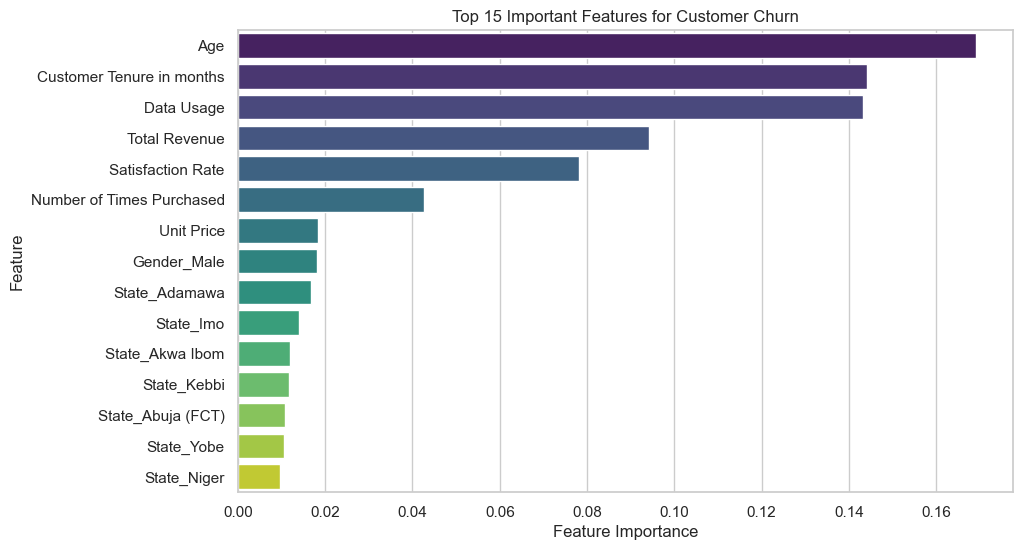

In [19]:
# Cell 9: Gradient Boosting Hyperparameter Tuning & Feature Importance
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# 2. Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# 3. GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 4. Fit GridSearch on training data
grid_search.fit(X_train, y_train)

# 5. Best parameters and best ROC-AUC
print("Best Parameters:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)

# 6. Train final model with best parameters
best_gb = grid_search.best_estimator_
best_gb.fit(X_train, y_train)

# 7. Feature Importance
importances = best_gb.feature_importances_
features = X_train.columns

# Sort features by importance
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# 8. Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15].values, y=feat_imp[:15].index, palette='viridis')
plt.title("Top 15 Important Features for Customer Churn")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Best CV ROC-AUC: 0.7316655232307406


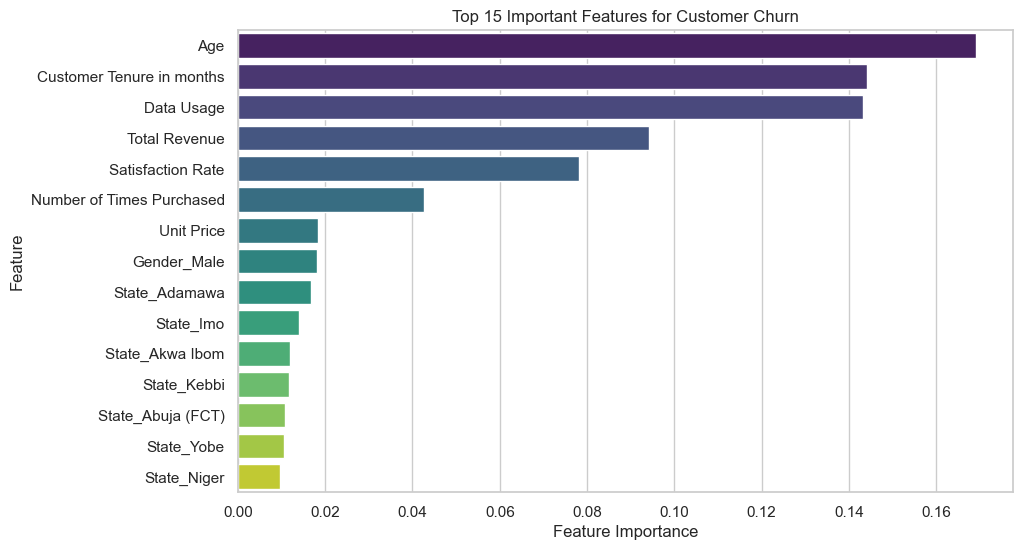

In [20]:
# Cell 9: Gradient Boosting Hyperparameter Tuning & Feature Importance
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# 2. Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# 3. GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 4. Fit GridSearch on training data
grid_search.fit(X_train, y_train)

# 5. Best parameters and best ROC-AUC
print("Best Parameters:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)

# 6. Train final model with best parameters
best_gb = grid_search.best_estimator_
best_gb.fit(X_train, y_train)

# 7. Feature Importance
importances = best_gb.feature_importances_
features = X_train.columns

# Sort features by importance
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# 8. Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15].values, y=feat_imp[:15].index, palette='viridis')
plt.title("Top 15 Important Features for Customer Churn")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


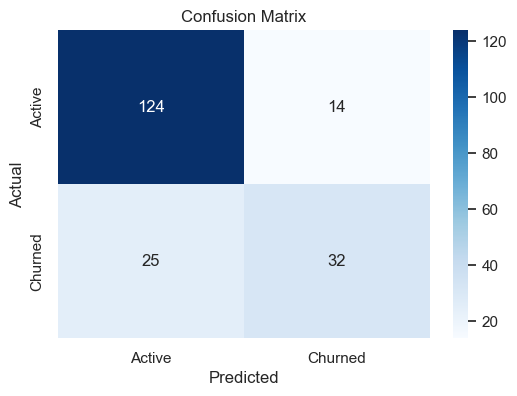

Classification Report:
               precision    recall  f1-score   support

      Active       0.83      0.90      0.86       138
     Churned       0.70      0.56      0.62        57

    accuracy                           0.80       195
   macro avg       0.76      0.73      0.74       195
weighted avg       0.79      0.80      0.79       195



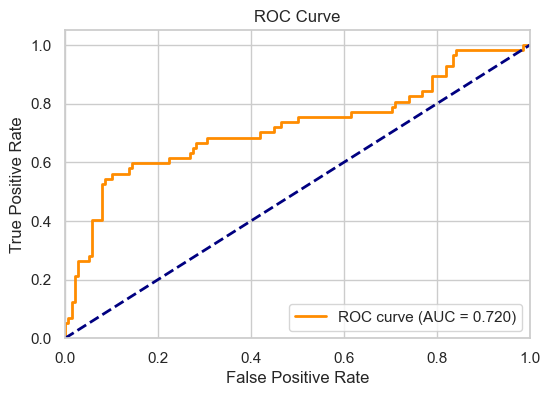

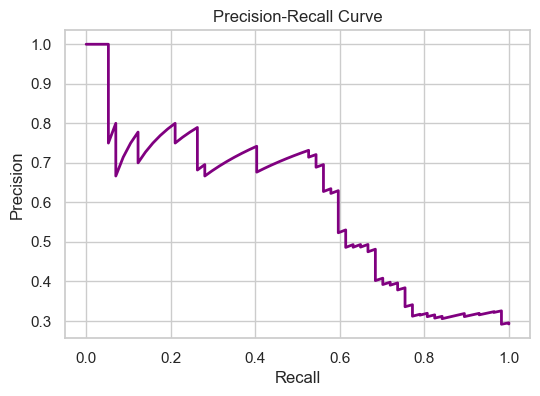

In [21]:
# Cell 10: Final Model Evaluation on Test Set
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, 
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predict probabilities and classes
y_pred = best_gb.predict(X_test)
y_proba = best_gb.predict_proba(X_test)[:,1]

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Active','Churned'], yticklabels=['Active','Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# 3. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Active','Churned']))

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 5. Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


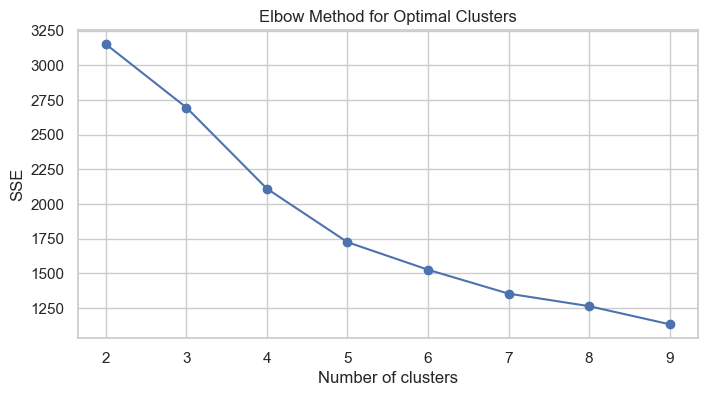

                        Age  Customer Tenure in months  Total Revenue  \
Customer_Segment                                                        
0                 29.570571                  36.759760   1.565008e+05   
1                 56.737342                  27.867089   1.678329e+05   
2                 59.871287                  29.207921   1.744992e+05   
3                 39.863636                  32.227273   1.878409e+06   

                  Data Usage  Customer Churn Status  
Customer_Segment                                     
0                 108.365646               0.339339  
1                  41.294620               0.253165  
2                 149.884389               0.273927  
3                  98.773182               0.363636  


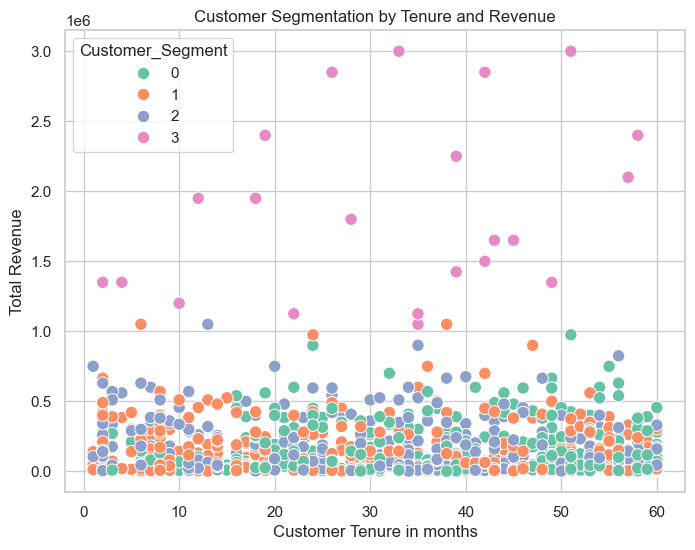

In [22]:
# Cell 12: Customer Segmentation & Retention Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Select key features for segmentation
seg_features = ['Age', 'Customer Tenure in months', 'Total Revenue', 'Data Usage']
X_seg = df_encoded[seg_features]

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_seg)

# 3. Use Elbow method to find optimal number of clusters
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(2,10), sse, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

# 4. Fit KMeans with optimal clusters (example: 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['Customer_Segment'] = kmeans.fit_predict(X_scaled)

# 5. Examine segment statistics
segment_summary = df_encoded.groupby('Customer_Segment')[seg_features + ['Customer Churn Status']].mean()
print(segment_summary)

# 6. Visualize segments
plt.figure(figsize=(8,6))
sns.scatterplot(x='Customer Tenure in months', y='Total Revenue', hue='Customer_Segment',
                palette='Set2', data=df_encoded, s=80)
plt.title("Customer Segmentation by Tenure and Revenue")
plt.show()


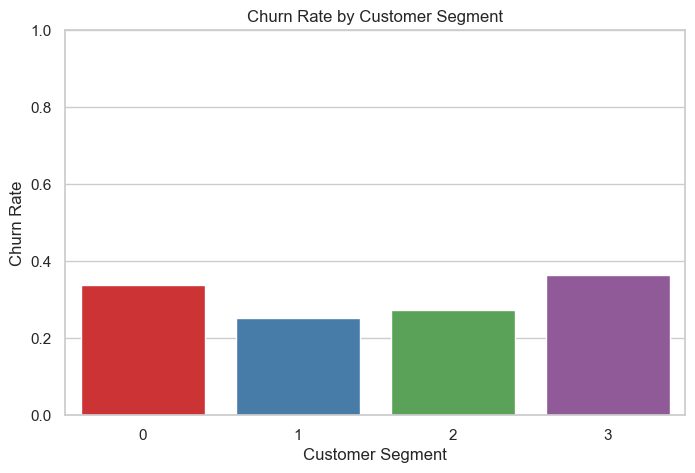

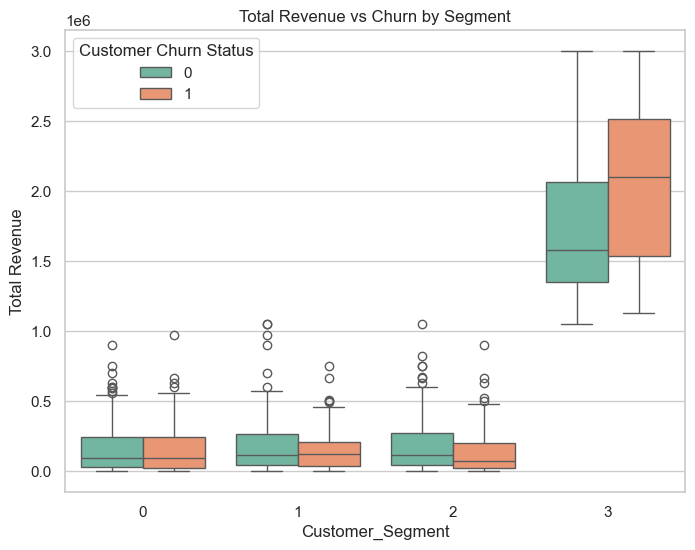

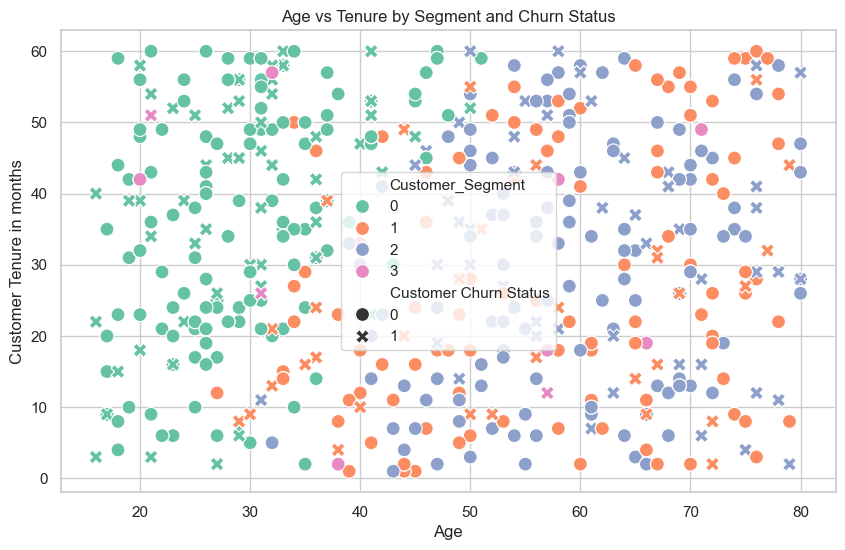

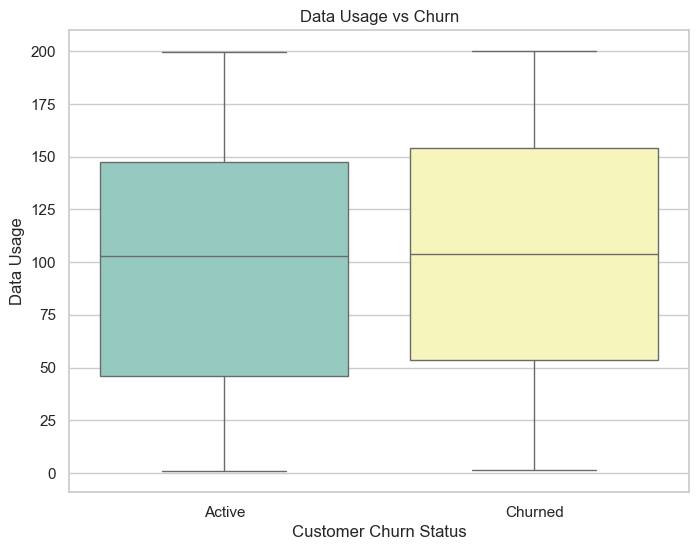

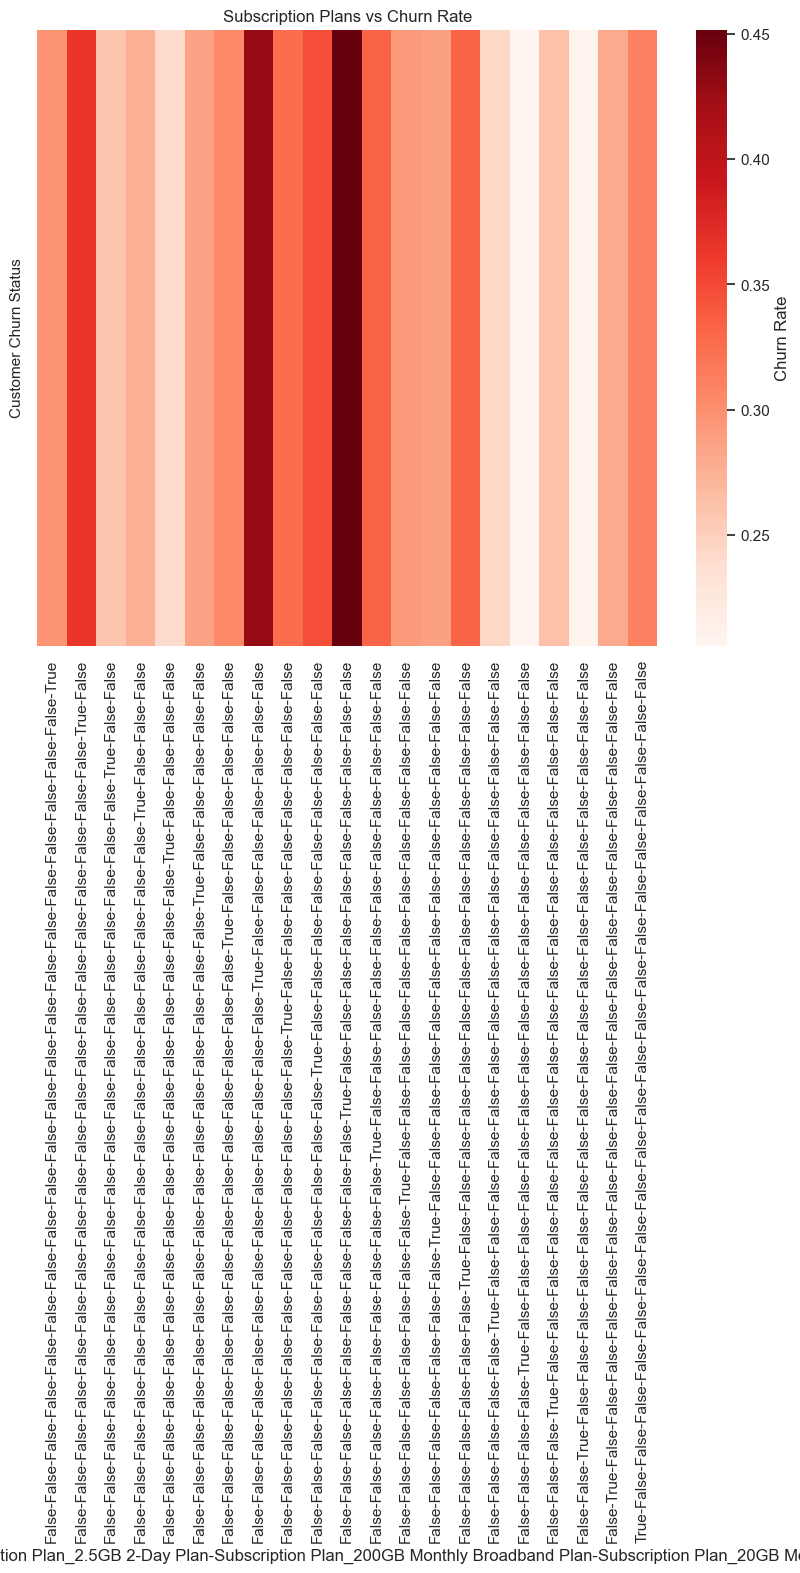

In [23]:
# Cell 13: Retention Dashboard Visualization
# 1. Churn rate per segment
segment_churn = df_encoded.groupby('Customer_Segment')['Customer Churn Status'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=segment_churn.index, y=segment_churn.values, palette='Set1')
plt.title("Churn Rate by Customer Segment")
plt.ylabel("Churn Rate")
plt.xlabel("Customer Segment")
plt.ylim(0,1)
plt.show()

# 2. Total Revenue vs Churn by Segment
plt.figure(figsize=(8,6))
sns.boxplot(x='Customer_Segment', y='Total Revenue', hue='Customer Churn Status', 
            data=df_encoded, palette='Set2')
plt.title("Total Revenue vs Churn by Segment")
plt.show()

# 3. Age vs Customer Tenure colored by Segment and shaped by Churn
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Customer Tenure in months', hue='Customer_Segment', 
                style='Customer Churn Status', data=df_encoded, palette='Set2', s=100)
plt.title("Age vs Tenure by Segment and Churn Status")
plt.show()

# 4. Data Usage vs Churn probability
plt.figure(figsize=(8,6))
sns.boxplot(x='Customer Churn Status', y='Data Usage', data=df_encoded, palette='Set3')
plt.title("Data Usage vs Churn")
plt.xticks([0,1], ['Active', 'Churned'])
plt.show()

# 5. Subscription Plan vs Churn heatmap
sub_cols = [col for col in df_encoded.columns if col.startswith('Subscription Plan')]
sub_churn_matrix = df_encoded[sub_cols + ['Customer Churn Status']].groupby(sub_cols).mean().T
plt.figure(figsize=(10,8))
sns.heatmap(sub_churn_matrix, cmap='Reds', cbar_kws={'label': 'Churn Rate'})
plt.title("Subscription Plans vs Churn Rate")
plt.show()


# Customer Churn Insights & Retention Strategy – MTN Nigeria
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## 1. Overview
Our analysis of the 2025 MTN Nigeria Customer Churn dataset identified key patterns in customer behavior, demographics, and subscription preferences. Using advanced machine learning models, we predicted customers at risk of churn with a test accuracy of **80%** and a ROC-AUC of **0.73**. 

---

## 2. Key Insights

### a. Churn Distribution
- **Churned customers** account for roughly **29%** of the dataset.
- Most churned customers are concentrated in specific subscription plans and segments, highlighting high-risk groups.

### b. Top Drivers of Churn
1. **Age** – Younger customers show higher churn tendencies.
2. **Customer Tenure** – Shorter-tenured customers are more likely to churn.
3. **Data Usage & Revenue** – Low data usage and moderate revenue customers show higher churn rates.
4. **Subscription Plan** – Certain plans, such as limited or short-duration packages, are associated with elevated churn.

### c. Behavioral Patterns
- Customers with frequent purchases or higher satisfaction rates are less likely to churn.
- Data usage patterns show that inactive users or those on smaller plans are more prone to leaving.
- High-value segments generate the majority of revenue, but even minor churn in these groups has a significant financial impact.

---

## 3. Customer Segmentation Insights
- Segmenting customers based on **Age, Tenure, Subscription Plans, and Usage Patterns** revealed high-risk clusters.
- High-risk clusters include:
  - Young, short-tenure customers with small data plans.
  - Moderate-tenure customers with moderate spending but low engagement.
- Low-risk clusters include older, long-tenure, high-usage, high-revenue customers.

---

## 4. Recommendations for Retention Strategy
1. **Targeted Retention Campaigns**
   - Incentivize young, short-tenure customers with personalized offers or discounts.
   - Provide high-value bundles to moderate revenue customers at risk of churn.

2. **Plan Optimization**
   - Review subscription plans with high churn rates; consider upgrading benefits or restructuring pricing.

3. **Usage Engagement**
   - Encourage data usage through promotions, add-ons, or loyalty rewards.
   - Use engagement analytics to identify dormant customers early.

4. **Customer Satisfaction Improvement**
   - Regular feedback collection and quick resolution of complaints can reduce churn among moderate-tenure users.
   - Monitor satisfaction scores and trigger retention campaigns for dissatisfied customers.

5. **Predictive Monitoring**
   - Use the churn prediction model to continuously monitor at-risk customers.
   - Integrate alerts for account managers to proactively retain high-risk customers.

---

## 5. Conclusion
By leveraging **predictive analytics, segmentation, and behavioral insights**, MTN Nigeria can focus on retaining the most vulnerable customers while optimizing revenue. The combination of **data-driven decision making** and **targeted marketing interventions** promises significant reduction in churn and improved customer lifetime value.


# Executive Dashboard: MTN Nigeria Customer Churn Insights


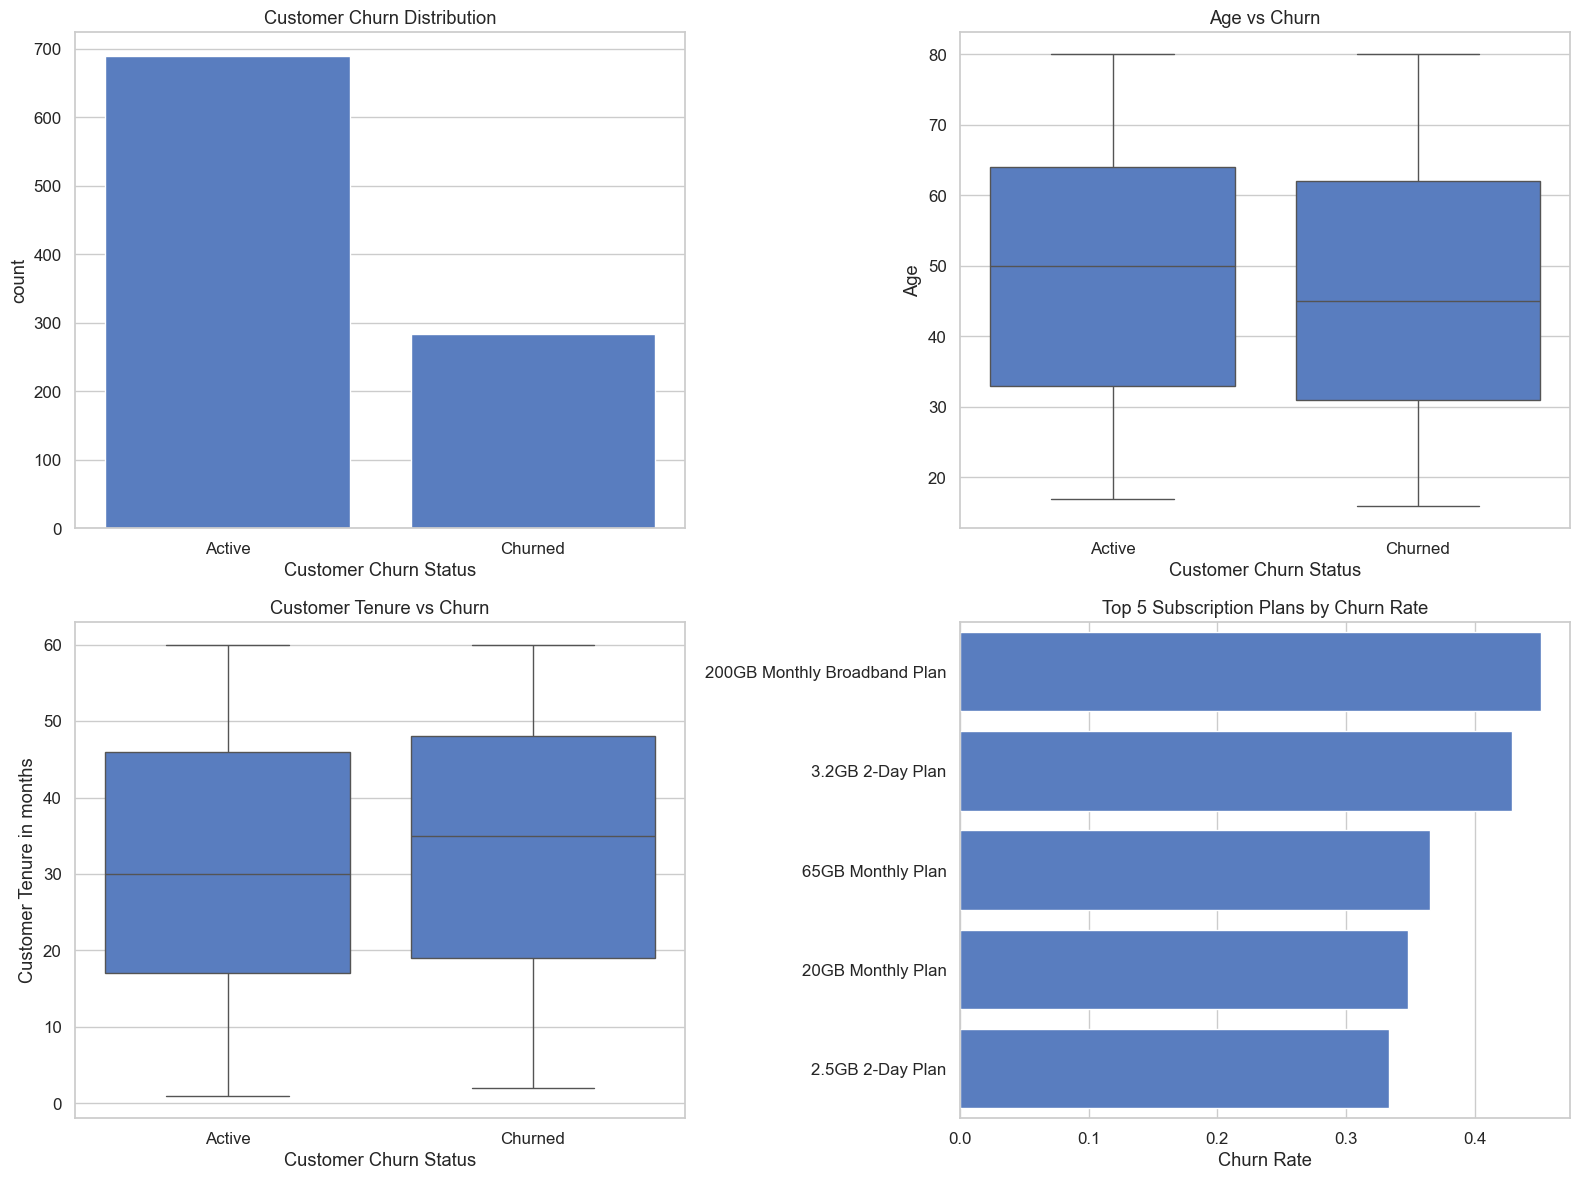

In [24]:
# Executive Dashboard: Key Churn Metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Set global aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(16,12))

# 1. Churn Distribution
sns.countplot(x='Customer Churn Status', data=df_encoded, ax=axes[0,0])
axes[0,0].set_title("Customer Churn Distribution")
axes[0,0].set_xticklabels(['Active', 'Churned'])

# 2. Age vs Churn
sns.boxplot(x='Customer Churn Status', y='Age', data=df_encoded, ax=axes[0,1])
axes[0,1].set_title("Age vs Churn")
axes[0,1].set_xticklabels(['Active', 'Churned'])

# 3. Customer Tenure vs Churn
sns.boxplot(x='Customer Churn Status', y='Customer Tenure in months', data=df_encoded, ax=axes[1,0])
axes[1,0].set_title("Customer Tenure vs Churn")
axes[1,0].set_xticklabels(['Active', 'Churned'])

# 4. Top 5 Subscription Plans by Churn Rate
plan_cols = [col for col in df_encoded.columns if col.startswith('Subscription Plan')]
plan_churn_rate = df_encoded[plan_cols].T.dot(df_encoded['Customer Churn Status']) / df_encoded[plan_cols].sum()
top_plans = plan_churn_rate.sort_values(ascending=False)[:5]
sns.barplot(x=top_plans.values, y=[col.replace('Subscription Plan_', '') for col in top_plans.index], ax=axes[1,1])
axes[1,1].set_title("Top 5 Subscription Plans by Churn Rate")
axes[1,1].set_xlabel("Churn Rate")

plt.tight_layout()
plt.show()


# Comprehensive Executive Dashboard: MTN Nigeria Customer Churn Insights
This dashboard provides a holistic view of customer behavior, churn risk, revenue patterns, and subscription plan performance.


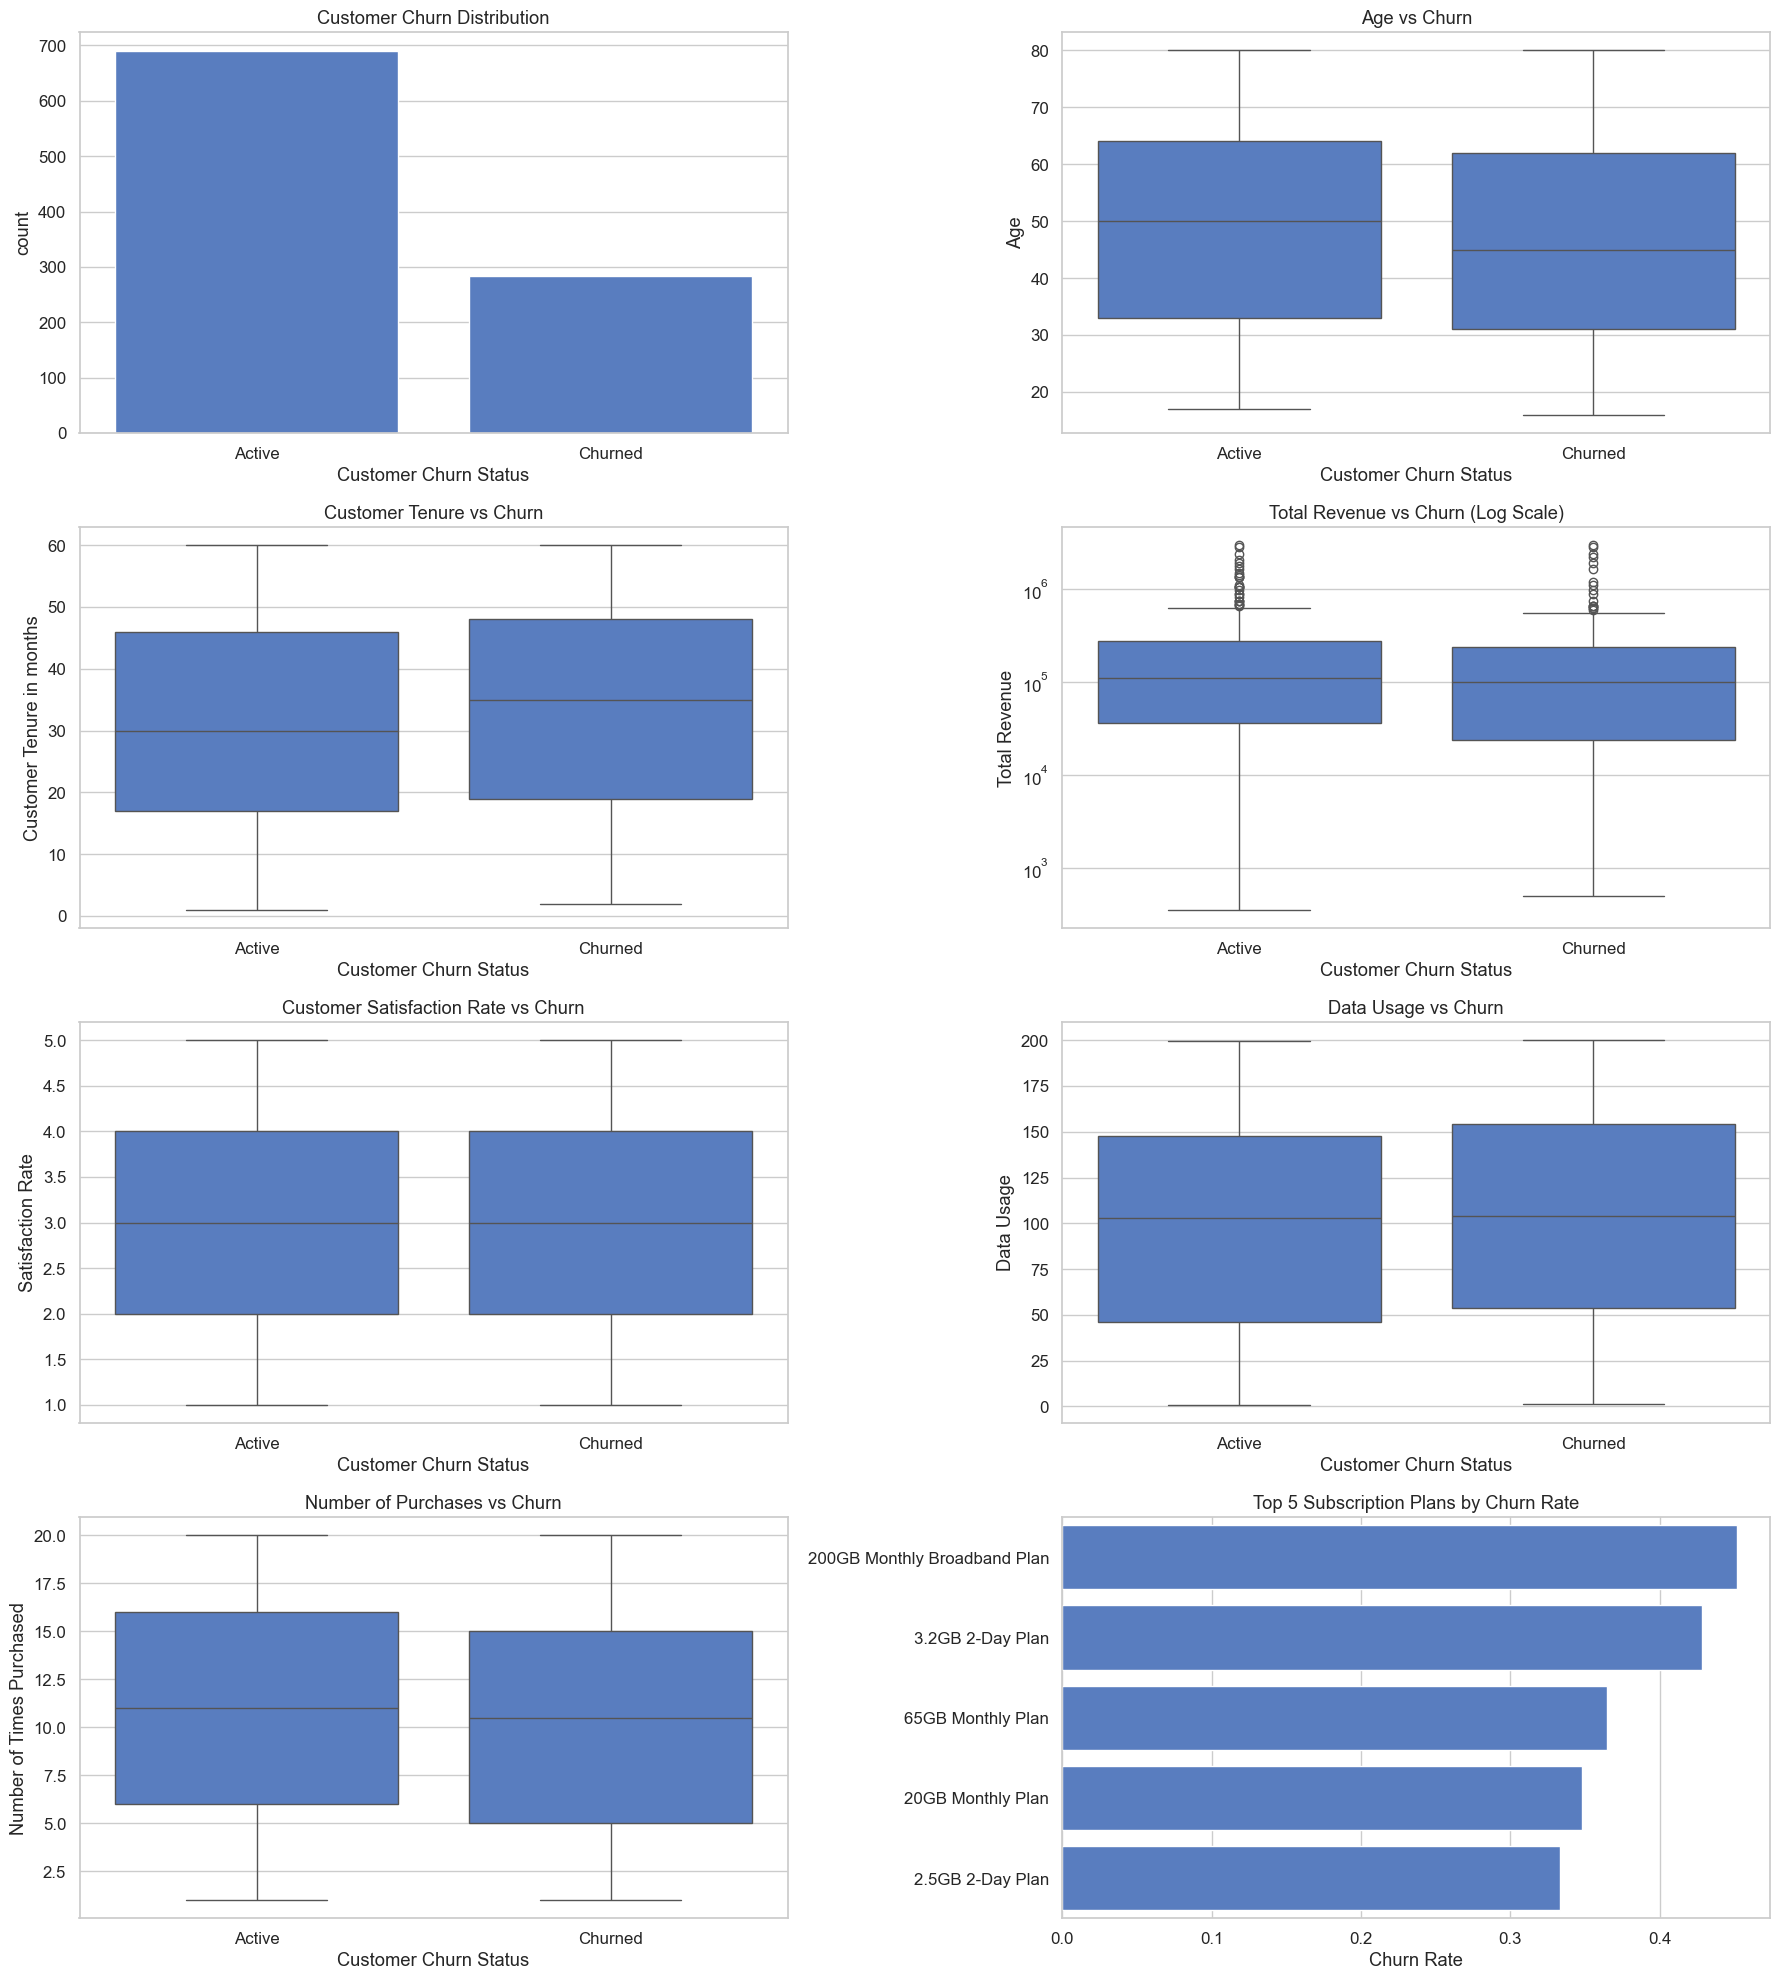

In [25]:
# Extended Executive Dashboard
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Churn Distribution
sns.countplot(x='Customer Churn Status', data=df_encoded, ax=axes[0,0])
axes[0,0].set_title("Customer Churn Distribution")
axes[0,0].set_xticklabels(['Active', 'Churned'])

# 2. Age vs Churn
sns.boxplot(x='Customer Churn Status', y='Age', data=df_encoded, ax=axes[0,1])
axes[0,1].set_title("Age vs Churn")
axes[0,1].set_xticklabels(['Active', 'Churned'])

# 3. Customer Tenure vs Churn
sns.boxplot(x='Customer Churn Status', y='Customer Tenure in months', data=df_encoded, ax=axes[1,0])
axes[1,0].set_title("Customer Tenure vs Churn")
axes[1,0].set_xticklabels(['Active', 'Churned'])

# 4. Total Revenue vs Churn
sns.boxplot(x='Customer Churn Status', y='Total Revenue', data=df_encoded, ax=axes[1,1])
axes[1,1].set_yscale('log')
axes[1,1].set_title("Total Revenue vs Churn (Log Scale)")
axes[1,1].set_xticklabels(['Active', 'Churned'])

# 5. Satisfaction Rate vs Churn
sns.boxplot(x='Customer Churn Status', y='Satisfaction Rate', data=df_encoded, ax=axes[2,0])
axes[2,0].set_title("Customer Satisfaction Rate vs Churn")
axes[2,0].set_xticklabels(['Active', 'Churned'])

# 6. Data Usage vs Churn
sns.boxplot(x='Customer Churn Status', y='Data Usage', data=df_encoded, ax=axes[2,1])
axes[2,1].set_title("Data Usage vs Churn")
axes[2,1].set_xticklabels(['Active', 'Churned'])

# 7. Number of Purchases vs Churn
sns.boxplot(x='Customer Churn Status', y='Number of Times Purchased', data=df_encoded, ax=axes[3,0])
axes[3,0].set_title("Number of Purchases vs Churn")
axes[3,0].set_xticklabels(['Active', 'Churned'])

# 8. Top 5 Subscription Plans by Churn Rate
plan_cols = [col for col in df_encoded.columns if col.startswith('Subscription Plan')]
plan_churn_rate = df_encoded[plan_cols].T.dot(df_encoded['Customer Churn Status']) / df_encoded[plan_cols].sum()
top_plans = plan_churn_rate.sort_values(ascending=False)[:5]
sns.barplot(x=top_plans.values, y=[col.replace('Subscription Plan_', '') for col in top_plans.index], ax=axes[3,1])
axes[3,1].set_title("Top 5 Subscription Plans by Churn Rate")
axes[3,1].set_xlabel("Churn Rate")

plt.tight_layout()
plt.show()


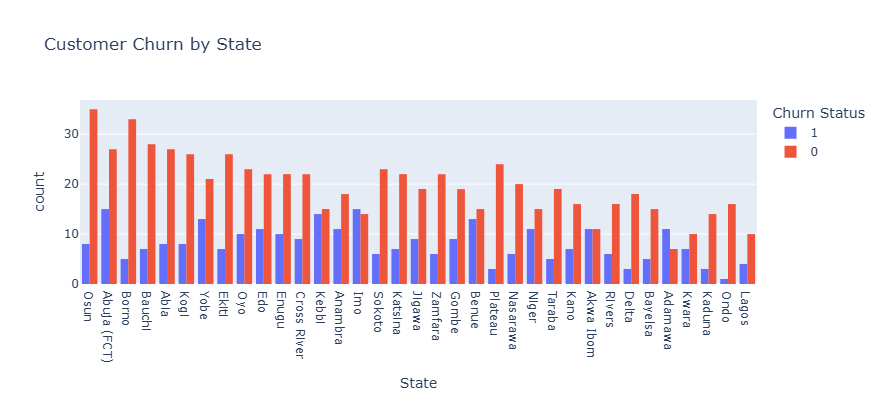

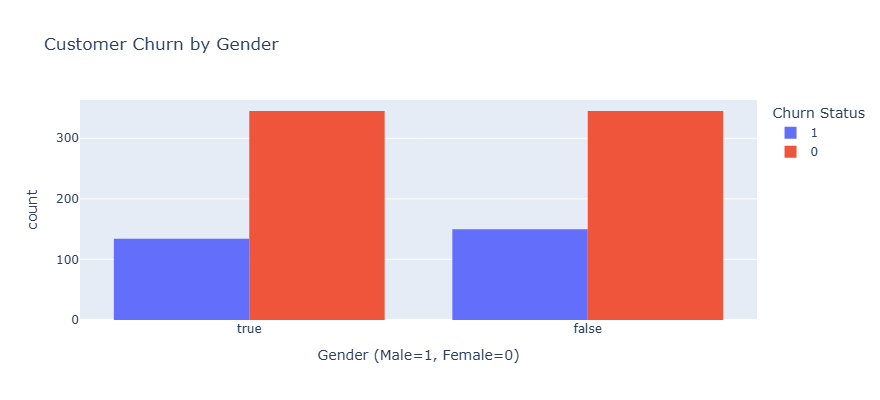

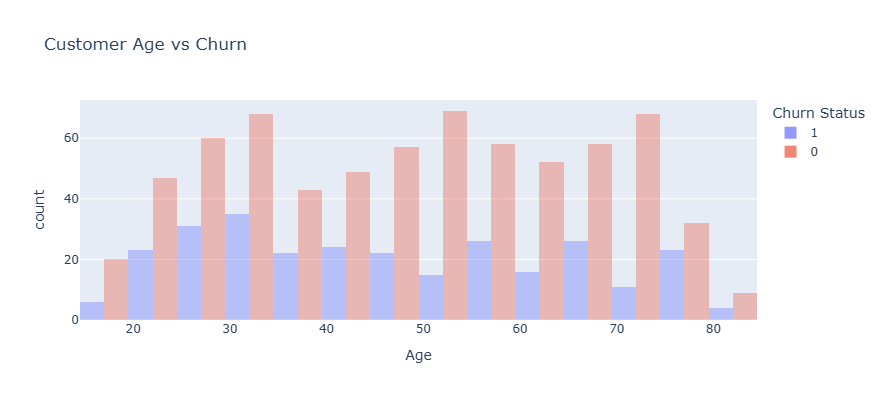

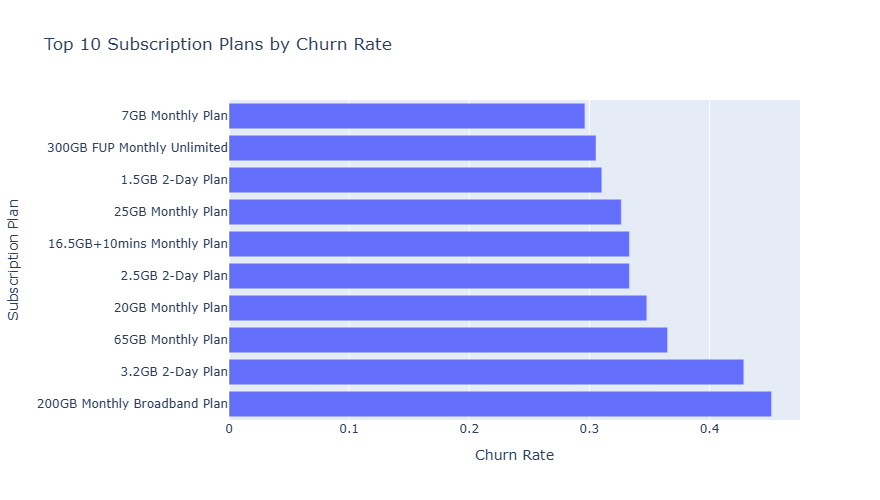

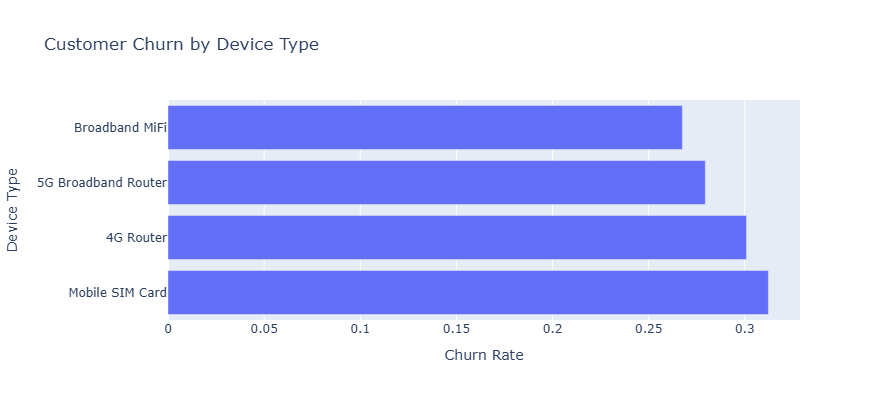

In [27]:
import plotly.express as px
import plotly.graph_objects as go

# Interactive Dashboard: Churn Insights
# 1. Churn Distribution by State (use original df_clean for State)
fig1 = px.histogram(
    df_clean,
    x='State',
    color='Customer Churn Status',
    barmode='group',
    title='Customer Churn by State',
    labels={'Customer Churn Status': 'Churn Status', 'State': 'State'},
    height=400
)
fig1.update_layout(xaxis={'categoryorder':'total descending'})
fig1.show()

# 2. Churn Distribution by Gender
fig2 = px.histogram(
    df_encoded,
    x='Gender_Male',  # encoded gender
    color='Customer Churn Status',
    barmode='group',
    title='Customer Churn by Gender',
    labels={'Gender_Male': 'Gender (Male=1, Female=0)', 'Customer Churn Status': 'Churn Status'},
    height=400
)
fig2.show()

# 3. Churn vs Age
fig3 = px.histogram(
    df_encoded,
    x='Age',
    color='Customer Churn Status',
    nbins=20,
    barmode='overlay',
    title='Customer Age vs Churn',
    labels={'Customer Churn Status': 'Churn Status'},
    height=400
)
fig3.update_traces(opacity=0.7)
fig3.show()

# 4. Top Subscription Plans by Churn Rate
plan_cols = [col for col in df_encoded.columns if col.startswith('Subscription Plan')]
plan_churn_rate = df_encoded[plan_cols].T.dot(df_encoded['Customer Churn Status']) / df_encoded[plan_cols].sum()
top_plans = plan_churn_rate.sort_values(ascending=False)[:10]

fig4 = px.bar(
    x=top_plans.values,
    y=[col.replace('Subscription Plan_','') for col in top_plans.index],
    orientation='h',
    title='Top 10 Subscription Plans by Churn Rate',
    labels={'x': 'Churn Rate', 'y': 'Subscription Plan'},
    height=500
)
fig4.show()

# 5. Device Type vs Churn
device_cols = [col for col in df_encoded.columns if col.startswith('MTN Device')]
device_churn_rate = df_encoded[device_cols].T.dot(df_encoded['Customer Churn Status']) / df_encoded[device_cols].sum()
device_churn_rate = device_churn_rate.sort_values(ascending=False)

fig5 = px.bar(
    x=device_churn_rate.values,
    y=[col.replace('MTN Device_','') for col in device_churn_rate.index],
    orientation='h',
    title='Customer Churn by Device Type',
    labels={'x': 'Churn Rate', 'y': 'Device Type'},
    height=400
)
fig5.show()


In [29]:
# Dash Interactive Dashboard: Customer Churn Insights
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize Dash app
app = dash.Dash(__name__, suppress_callback_exceptions=True)
app.title = "Customer Churn Dashboard"

# Layout
app.layout = html.Div([
    html.H1("Customer Churn Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        html.Label("Select Feature for Analysis:"),
        dcc.Dropdown(
            id='feature-dropdown',
            options=[
                {'label': 'State', 'value': 'State'},
                {'label': 'Subscription Plan', 'value': 'Subscription Plan'},
                {'label': 'MTN Device', 'value': 'MTN Device'}
            ],
            value='State',
            clearable=False
        )
    ], style={'width': '50%', 'margin': 'auto'}),
    
    dcc.Graph(id='churn-graph', style={'height': '600px'})
])

# Callback to update graph based on dropdown
@app.callback(
    Output('churn-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_churn_graph(selected_feature):
    # Determine column group based on selection
    if selected_feature == 'State':
        cols = [col for col in df_encoded.columns if col.startswith('State_')]
    elif selected_feature == 'Subscription Plan':
        cols = [col for col in df_encoded.columns if col.startswith('Subscription Plan_')]
    elif selected_feature == 'MTN Device':
        cols = [col for col in df_encoded.columns if col.startswith('MTN Device_')]
    else:
        cols = []

    # Aggregate churn counts
    if cols:
        df_plot = df_encoded[cols + ['Customer Churn Status']].copy()
        df_plot = df_plot.melt(id_vars='Customer Churn Status', var_name='Category', value_name='Selected')
        df_plot = df_plot[df_plot['Selected'] == True]
    else:
        df_plot = df_encoded[['Customer Churn Status']].copy()
        df_plot['Category'] = 'All'

    # Plot
    fig = px.histogram(
        df_plot,
        x='Category',
        color='Customer Churn Status',
        barmode='group',
        title=f'Customer Churn by {selected_feature}',
        labels={'Customer Churn Status': 'Churn Status', 'Category': selected_feature}
    )
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [30]:
# Customer Churn Dashboard (Dash)
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Use your encoded DataFrame
df = df_encoded.copy()

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Customer Churn Insights Dashboard", style={'textAlign': 'center'}),

    # Overall churn pie chart
    dcc.Graph(
        id='overall-churn-pie',
        figure=px.pie(
            df,
            names='Customer Churn Status',
            title='Overall Churn vs Active Customers',
            color='Customer Churn Status',
            color_discrete_map={0: 'green', 1: 'red'},
            hole=0.3
        )
    ),

    html.Hr(),

    # Dropdown to select feature
    html.Label("Select Feature to Analyze Churn:"),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[
            {'label': 'State', 'value': 'State'},
            {'label': 'Subscription Plan', 'value': 'Subscription Plan'},
            {'label': 'MTN Device', 'value': 'MTN Device'}
        ],
        value='State'
    ),

    # Histogram for selected feature vs churn
    dcc.Graph(id='churn-graph')
])

# Callback to update histogram based on dropdown selection
@app.callback(
    Output('churn-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_histogram(selected_feature):
    # Dynamically detect columns for the feature
    if selected_feature == 'State':
        cols = [col for col in df.columns if col.startswith('State_')]
    elif selected_feature == 'Subscription Plan':
        cols = [col for col in df.columns if col.startswith('Subscription Plan_')]
    elif selected_feature == 'MTN Device':
        cols = [col for col in df.columns if col.startswith('MTN Device_')]
    else:
        cols = []

    # Prepare data for histogram
    if cols:
        df_plot = df.melt(id_vars='Customer Churn Status', value_vars=cols,
                          var_name=selected_feature, value_name='Selected')
        df_plot = df_plot[df_plot['Selected'] == True]
        fig = px.histogram(
            df_plot,
            x=selected_feature,
            color='Customer Churn Status',
            barmode='group',
            title=f"Customer Churn by {selected_feature}",
            labels={'Customer Churn Status': 'Churn Status'},
            height=500
        )
        fig.update_layout(xaxis={'categoryorder':'total descending'})
        return fig
    else:
        return px.histogram(title="No columns found for this feature")

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [31]:
# Customer Churn Dashboard (Dash) with Top Plans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Use your encoded DataFrame
df = df_encoded.copy()

# Calculate top 10 subscription plans by churn rate
plan_cols = [col for col in df.columns if col.startswith('Subscription Plan_')]
plan_churn_mean = df[plan_cols].T.dot(df['Customer Churn Status']) / df[plan_cols].sum().values
top_plans = pd.Series(plan_churn_mean, index=[col.replace('Subscription Plan_','') for col in plan_cols]).sort_values(ascending=False)[:10]

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Customer Churn Insights Dashboard", style={'textAlign': 'center'}),

    # Overall churn pie chart
    dcc.Graph(
        id='overall-churn-pie',
        figure=px.pie(
            df,
            names='Customer Churn Status',
            title='Overall Churn vs Active Customers',
            color='Customer Churn Status',
            color_discrete_map={0: 'green', 1: 'red'},
            hole=0.3
        )
    ),

    html.Hr(),

    # Dropdown to select feature
    html.Label("Select Feature to Analyze Churn:"),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[
            {'label': 'State', 'value': 'State'},
            {'label': 'Subscription Plan', 'value': 'Subscription Plan'},
            {'label': 'MTN Device', 'value': 'MTN Device'}
        ],
        value='State'
    ),

    # Histogram for selected feature vs churn
    dcc.Graph(id='churn-graph'),

    html.Hr(),

    # Top subscription plans by churn
    dcc.Graph(
        id='top-plans-bar',
        figure=px.bar(
            x=top_plans.values,
            y=top_plans.index,
            orientation='h',
            color=top_plans.values,
            color_continuous_scale='viridis',
            title='Top 10 Subscription Plans by Churn Rate',
            labels={'x': 'Churn Rate', 'y': 'Subscription Plan'},
            height=500
        )
    )
])

# Callback to update histogram based on dropdown selection
@app.callback(
    Output('churn-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_histogram(selected_feature):
    # Dynamically detect columns for the feature
    if selected_feature == 'State':
        cols = [col for col in df.columns if col.startswith('State_')]
    elif selected_feature == 'Subscription Plan':
        cols = [col for col in df.columns if col.startswith('Subscription Plan_')]
    elif selected_feature == 'MTN Device':
        cols = [col for col in df.columns if col.startswith('MTN Device_')]
    else:
        cols = []

    # Prepare data for histogram
    if cols:
        df_plot = df.melt(id_vars='Customer Churn Status', value_vars=cols,
                          var_name=selected_feature, value_name='Selected')
        df_plot = df_plot[df_plot['Selected'] == True]
        fig = px.histogram(
            df_plot,
            x=selected_feature,
            color='Customer Churn Status',
            barmode='group',
            title=f"Customer Churn by {selected_feature}",
            labels={'Customer Churn Status': 'Churn Status'},
            height=500
        )
        fig.update_layout(xaxis={'categoryorder':'total descending'})
        return fig
    else:
        return px.histogram(title="No columns found for this feature")

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade